In [2]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import os
import pydotplus
import scipy.stats as stats
import matplotlib.pyplot as plt
import subprocess
from mpl_toolkits.mplot3d import Axes3D
from collections import defaultdict, OrderedDict
from scipy.stats.stats import pearsonr 
from sklearn import preprocessing
from IPython.display import Image  
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn import cross_validation
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import *
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn import neighbors
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from scipy.cluster.hierarchy import fcluster
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

C:\Users\Mario\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
df = pd.read_csv("training.csv")
pd.set_option('display.max_columns', 500)

In [4]:
dt = pd.read_csv("test.csv")

In [5]:
df.info() # general information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
RefId                                72983 non-null int64
IsBadBuy                             72983 non-null int64
PurchDate                            72983 non-null object
Auction                              72983 non-null object
VehYear                              72983 non-null int64
VehicleAge                           72983 non-null int64
Make                                 72983 non-null object
Model                                72983 non-null object
Trim                                 70624 non-null object
SubModel                             72975 non-null object
Color                                72975 non-null object
Transmission                         72974 non-null object
WheelTypeID                          69814 non-null float64
WheelType                            69809 non-null object
VehOdo                               72983 non-null int64
Nationalit

In [5]:
df.corr() # Returns the Pearson correlation coefficient between attributes

,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
RefId,1.000000,0.023973,0.010580,-0.025404,0.013110,-0.026553,-0.011568,-0.015704,-0.032208,-0.034324,-0.008742,-0.013015,-0.021616,-0.024369,0.032896,0.131898,-0.011873,-0.048851,-0.023478
IsBadBuy,0.023973,1.000000,-0.158886,0.167164,-0.044620,0.082560,-0.109252,-0.102954,-0.087418,-0.083665,-0.109112,-0.104020,-0.103914,-0.100245,-0.061488,0.005796,-0.099911,-0.003697,0.052319
VehYear,0.010580,-0.158886,1.000000,-0.957957,0.259660,-0.283719,0.581146,0.532927,0.581191,0.539230,0.590820,0.548426,0.598490,0.558669,0.280791,0.068276,0.349965,0.057380,-0.268696
VehicleAge,-0.025404,0.167164,-0.957957,1.000000,-0.250801,0.319794,-0.565690,-0.518810,-0.460854,-0.426382,-0.575607,-0.532505,-0.504062,-0.469359,-0.268269,-0.074857,-0.312329,-0.024771,0.259310
WheelTypeID,0.013110,-0.044620,0.259660,-0.250801,1.000000,-0.213558,-0.095471,-0.129597,-0.072700,-0.102019,-0.088597,-0.121211,-0.074420,-0.102488,0.187199,0.007901,-0.162826,-0.006747,-0.132798
VehOdo,-0.026553,0.082560,-0.283719,0.319794,-0.213558,1.000000,-0.017022,0.024617,0.031306,0.063165,-0.028568,0.012107,0.015811,0.048005,-0.288456,-0.053041,-0.062008,0.029556,0.411718
MMRAcquisitionAuctionAveragePrice,-0.011568,-0.109252,0.581146,-0.565690,-0.095471,-0.017022,1.000000,0.990347,0.910391,0.910187,0.937817,0.932492,0.871755,0.871042,0.107734,0.045694,0.789840,0.038818,-0.050417
MMRAcquisitionAuctionCleanPrice,-0.015704,-0.102954,0.532927,-0.518810,-0.129597,0.024617,0.990347,1.000000,0.902718,0.918242,0.923610,0.932114,0.860716,0.871203,0.062502,0.040675,0.781516,0.038667,-0.020644
MMRAcquisitionRetailAveragePrice,-0.032208,-0.087418,0.581191,-0.460854,-0.072700,0.031306,0.910391,0.902718,1.000000,0.990201,0.851647,0.849407,0.913108,0.906054,0.107516,0.035489,0.746126,0.080627,-0.053444
MMRAcquisitonRetailCleanPrice,-0.034324,-0.083665,0.539230,-0.426382,-0.102019,0.063165,0.910187,0.918242,0.990201,1.000000,0.846914,0.855689,0.903188,0.906810,0.069676,0.031284,0.744966,0.077670,-0.026933


In [6]:
df['IsOnlineSale'].value_counts() # count number of online and conventional sales

0    71138
1     1845
Name: IsOnlineSale, dtype: int64

In [ ]:
df['IsBadBuy'].value_counts() # count number of bad and good buys

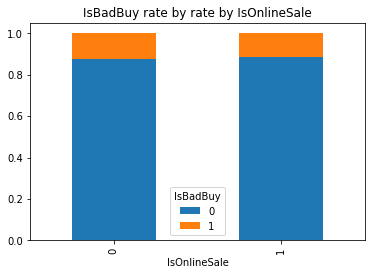

In [19]:
isOnlineSale_val_xt = pd.crosstab(df['IsOnlineSale'], df['IsBadBuy']) # compute a simple cross-tabulation of two attributes
isOnlineSale_val_xt_pct = isOnlineSale_val_xt.div(isOnlineSale_val_xt.sum(1).astype(float), axis=0)
isOnlineSale_val_xt_pct.plot(kind='bar', stacked=True, title='IsBadBuy rate by rate by IsOnlineSale')

In [11]:
df.PRIMEUNIT.value_counts(dropna=False) # This attribute contains mostly NULL values

NaN    69564
NO      3357
YES       62
Name: PRIMEUNIT, dtype: int64

In [13]:
count = 0
for index, unit in df['PRIMEUNIT'].iteritems():
    if unit == 'NO' and df.loc[index, 'IsBadBuy'] == 1:
        count = count + 1
print count

127


In [ ]:
df['MonthPurchDate'] = np.nan # Normalizes the date of the vehicle purchase to make it easier to analyse.
#Every date is transformed to represent the time when the purchase was made 
#only in absolute months (integer values) starting from the year 2000
modified_date = ""
for index, date in df['PurchDate'].iteritems():
    if "-" in date:
        modified_date = date.replace("-", "/")
    else:
        modified_date = date
    df.loc[index, 'MonthPurchDate'] = (12*int(date[-2:])) - (12-(int(modified_date.rsplit("/", 2)[0])))

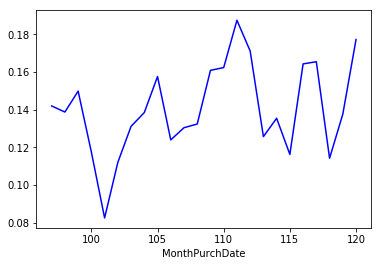

In [22]:
month_xt = pd.crosstab(df['MonthPurchDate'], df['IsBadBuy']).apply(lambda x: x.div(x[0]), axis=1) 
month_xt[1].plot(kind='line', color='blue') # Plots the ratio of bad buy to good buys, w.r.t to the month of the purchase

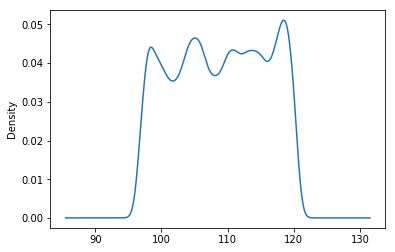

In [24]:
df['MonthPurchDate'].plot.kde()

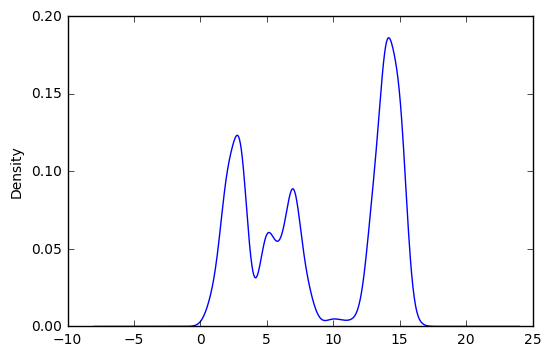

In [19]:
# dates = sorted(df['Color'].unique())
# dates_mapping = dict(zip(dates, range(0, len(dates))))
# df['Color_Val'] = df['Color'].map(dates_mapping).astype(int)
# df['Color_Val'].plot.kde()

In [22]:
df['Transmission'].value_counts()

AUTO      70398
MANUAL     2576
Name: Transmission, dtype: int64

In [26]:
df['Transmission'].fillna('AUTO', inplace=True) # replace missing values with the most common for this attribute

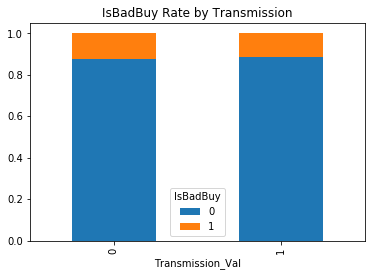

In [27]:
transmissions = sorted(df['Transmission'].unique()) # plot IsbadBuy rate by transmission type
transmissions_mapping = dict(zip(transmissions, range(0, len(transmissions))))
df['Transmission_Val'] = df['Transmission'].map(transmissions_mapping).astype(int)
transmission_val_xt = pd.crosstab(df['Transmission_Val'], df['IsBadBuy'])
transmission_val_xt_pct = transmission_val_xt.div(transmission_val_xt.sum(1).astype(float), axis=0)
transmission_val_xt_pct.plot(kind='bar', stacked=True, title='IsBadBuy Rate by Transmission')

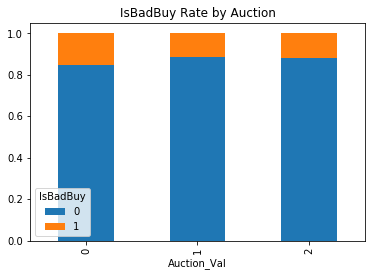

In [28]:
autions = sorted(df['Auction'].unique()) # plot IsBadBuyRate by Auction type
autions_mapping = dict(zip(autions, range(0, len(autions))))
df['Auction_Val'] = df['Auction'].map(autions_mapping).astype(int)
auction_val_xt = pd.crosstab(df['Auction_Val'], df['IsBadBuy'])
auction_val_xt_pct = auction_val_xt.div(auction_val_xt.sum(1).astype(float), axis=0)
auction_val_xt_pct.plot(kind='bar', stacked=True, title='IsBadBuy Rate by Auction')

In [29]:
df['Auction'].value_counts(dropna=False) # View count for all Auction types

MANHEIM    41043
OTHER      17501
ADESA      14439
Name: Auction, dtype: int64

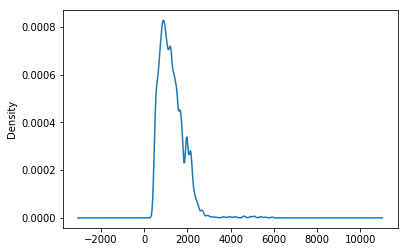

In [45]:
df['WarrantyCost'].plot.kde() # KDE plot of WarrantyCost

In [29]:
df['StandardizedVehAge'] = np.nan # Z-score standardize the VehicleAge attribute
vehAgeMean = df['VehicleAge'].mean()
vehAgeStd = df['VehicleAge'].std()
for index, age in df['VehicleAge'].iteritems():
    df.loc[index, 'StandardizedVehAge']=((age-vehAgeMean)/vehAgeStd)

0       -0.687208
1        0.480873
2       -0.103167
3        0.480873
4       -0.103167
5        0.480873
6        0.480873
7       -0.103167
8       -1.271248
9       -1.271248
10      -0.103167
11       2.232994
12      -0.103167
13      -0.103167
14      -0.687208
15       1.064914
16      -0.103167
17       1.064914
18      -0.103167
19       0.480873
20       1.648954
21       1.648954
22       0.480873
23      -0.687208
24      -1.271248
25       0.480873
26       1.648954
27       0.480873
28       0.480873
29      -0.103167
           ...   
72953   -0.687208
72954   -1.855288
72955   -1.271248
72956   -1.271248
72957   -0.103167
72958   -0.687208
72959   -0.103167
72960   -1.271248
72961    1.648954
72962   -0.103167
72963    1.648954
72964   -0.687208
72965   -0.103167
72966   -0.103167
72967   -0.687208
72968    0.480873
72969    0.480873
72970   -0.103167
72971   -1.271248
72972   -0.687208
72973   -0.687208
72974    1.648954
72975   -1.271248
72976    0.480873
72977   -0

Text(0,0.5,u'Probability')

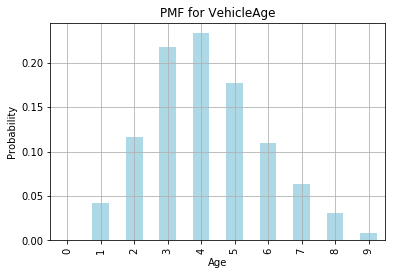

In [30]:
 age_pmf = df['VehicleAge'].value_counts().sort_index() / len(df['VehicleAge']) # probability mass function for VehicleAge
 age_pmf.plot(kind='bar', color='lightblue', title='PMF for VehicleAge', grid=True)  
 plt.xlabel('Age')
 plt.ylabel('Probability')

([<matplotlib.axis.XTick at 0xbacde80>,
 <a list of 11 Text xticklabel objects>)

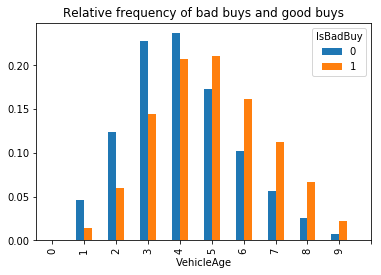

In [31]:
#Total number of bad (good) buys for a vehicle age divided by the total number of bad (good) buys
pclass_xt = pd.crosstab(df['VehicleAge'], df['IsBadBuy']).apply(lambda r: r/r.sum(), axis=0)
pclass_xt.plot(kind='bar')
plt.title("Relative frequency of bad buys and good buys")
plt.xticks(range(0, 11, 1))

In [36]:
len(df[df.IsBadBuy==1]) # Total number of bad buys (dataset is very unbalanced)

8976

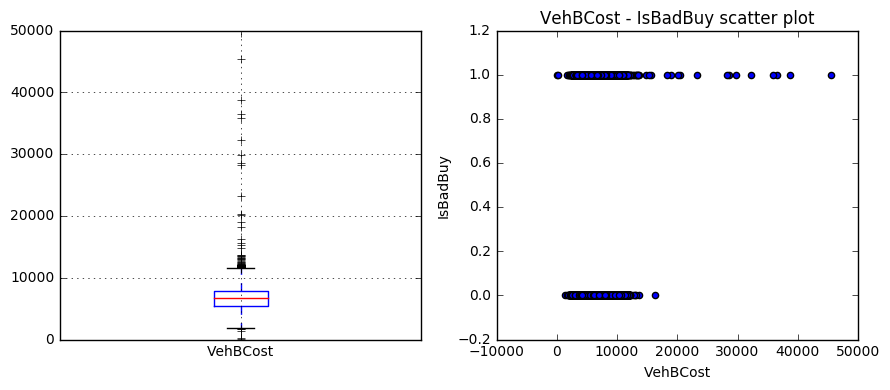

In [110]:
fig = plt.figure(figsize=(9,4))
fig_dims = (1, 2)

plt.subplot2grid(fig_dims, (0, 0))
df.boxplot('VehBCost')
fig.tight_layout()
plt.subplot2grid(fig_dims, (0, 1))
plt.scatter(df['VehBCost'], df['IsBadBuy'])
plt.title('VehBCost - IsBadBuy scatter plot')
plt.xlabel('VehBCost')
plt.ylabel('IsBadBuy')
plt.tight_layout()

Text(0.5,0,u'MMRCurrentAuctionAveragePrice')

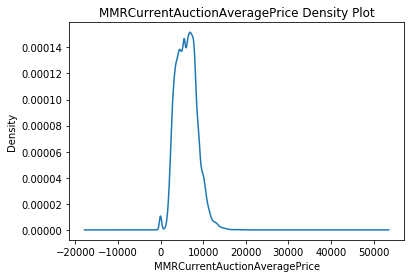

In [36]:
df['MMRCurrentAuctionAveragePrice'].plot(kind='kde')
plt.title('MMRCurrentAuctionAveragePrice Density Plot')
plt.xlabel('MMRCurrentAuctionAveragePrice')

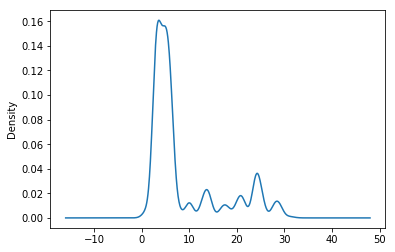

In [44]:
makers = sorted(df['Make'].unique()) # map the car manufacturers and plot their frequency using KDE
makers_mapping = dict(zip(makers, range(0, len(makers))))
df['Make_Val'] = df['Make'].map(makers_mapping).astype(int)
df['Make_Val'].plot.kde()

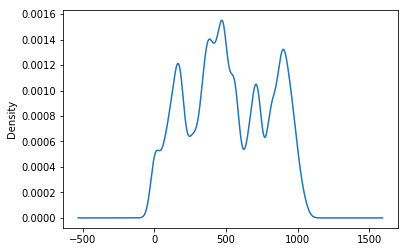

In [43]:
makers = sorted(df['Model'].unique()) # map the car models and plot their frequency using KDE
makers_mapping = dict(zip(makers, range(0, len(makers))))
df['Model_Val'] = df['Model'].map(makers_mapping).astype(int)
df['Model_Val'].plot.kde()

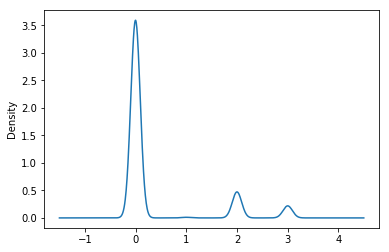

In [42]:
makers = sorted(df['Nationality'].unique()) # map the car manufacturer nationalities and plot their frequency using KDE
makers_mapping = dict(zip(makers, range(0, len(makers))))
df['Nationality_Val'] = df['Nationality'].map(makers_mapping).astype(int)
df['Nationality_Val'].plot.kde()

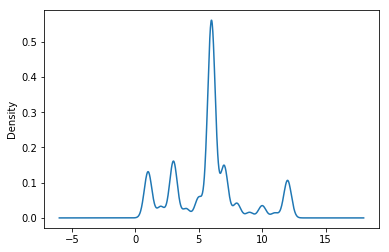

In [41]:
makers = sorted(df['Size'].unique()) # map the car sizes and plot their frequency using KDE
makers_mapping = dict(zip(makers, range(0, len(makers))))
df['Size_Val'] = df['Size'].map(makers_mapping).astype(int)
df['Size_Val'].plot.kde()

Text(0,0.5,u'Probability')

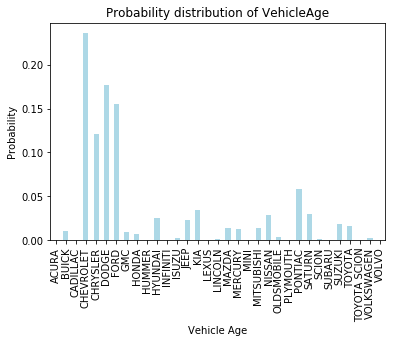

In [40]:
 make_pmf = df['Make'].value_counts().sort_index() / len(df['Make']) # plot vehicle age against the car manufacturer
 make_pmf.plot(kind='bar', color='lightblue', title='Probability distribution of VehicleAge')  
 plt.xlabel('Vehicle Age')
 plt.ylabel('Probability')

In [ ]:
#Replace all missing values of the below attributes with the respective medians of the segments 
#Values in a segment have the same MonthPurchDate and Make/Model values

In [46]:
df['MMRAcquisitionAuctionCleanPriceFill'] = df['MMRAcquisitionAuctionCleanPrice']
for index, price in df['MMRAcquisitionAuctionCleanPriceFill'].iteritems():
    if price == 0 or price == 1:
        df.loc[index, 'MMRAcquisitionAuctionCleanPriceFill'] = np.nan
df['MMRAcquisitionAuctionCleanPriceFill'] = df['MMRAcquisitionAuctionCleanPriceFill'].groupby([df['MonthPurchDate'], df['Model']]) \
                        .apply(lambda x: x.replace(to_replace=np.nan, value=x.median()))
df['MMRAcquisitionAuctionCleanPriceFill'] = df['MMRAcquisitionAuctionCleanPriceFill'].groupby([df['MonthPurchDate'], df['Make']]) \
                        .apply(lambda x: x.replace(to_replace=np.nan, value=x.median()))
df['MMRAcquisitionAuctionCleanPriceFill'] = df['MMRAcquisitionAuctionCleanPriceFill'].groupby([ df['Make']]) \
                        .apply(lambda x: x.replace(to_replace=np.nan, value=x.median()))

In [47]:
dt['MMRAcquisitionAuctionCleanPriceFill'] = dt['MMRAcquisitionAuctionCleanPrice']
for index, price in dt['MMRAcquisitionAuctionCleanPriceFill'].iteritems():
    if price == 0 or price == 1:
        dt.loc[index, 'MMRAcquisitionAuctionCleanPriceFill'] = np.nan
dt['MMRAcquisitionAuctionCleanPriceFill'] = dt['MMRAcquisitionAuctionCleanPriceFill'].groupby([dt['MonthPurchDate'], dt['Model']]) \
                        .apply(lambda x: x.replace(to_replace=np.nan, value=x.median()))
dt['MMRAcquisitionAuctionCleanPriceFill'] = dt['MMRAcquisitionAuctionCleanPriceFill'].groupby([dt['MonthPurchDate'], dt['Make']]) \
                        .apply(lambda x: x.replace(to_replace=np.nan, value=x.median()))
dt['MMRAcquisitionAuctionCleanPriceFill'] = dt['MMRAcquisitionAuctionCleanPriceFill'].groupby([ dt['Make']]) \
                        .apply(lambda x: x.replace(to_replace=np.nan, value=x.median()))


In [48]:
df['MMRAcquisitionRetailCleanPriceFill'] = df['MMRAcquisitonRetailCleanPrice']
for index, price in df['MMRAcquisitionRetailCleanPriceFill'].iteritems():
    if price == 0 or price == 1:
        df.loc[index, 'MMRAcquisitionRetailCleanPriceFill'] = np.nan
df['MMRAcquisitionRetailCleanPriceFill'] = df['MMRAcquisitionRetailCleanPriceFill'].groupby([df['MonthPurchDate'], df['Model']]) \
                        .apply(lambda x: x.replace(to_replace=np.nan, value=x.median()))
df['MMRAcquisitionRetailCleanPriceFill'] = df['MMRAcquisitionRetailCleanPriceFill'].groupby([df['MonthPurchDate'], df['Make']]) \
                        .apply(lambda x: x.replace(to_replace=np.nan, value=x.median()))
df['MMRAcquisitionRetailCleanPriceFill'] = df['MMRAcquisitionRetailCleanPriceFill'].groupby([ df['Make']]) \
                        .apply(lambda x: x.replace(to_replace=np.nan, value=x.median()))


In [49]:
df['MMRCurrentAuctionCleanPriceFill'] = df['MMRCurrentAuctionCleanPrice']
for index, price in df['MMRCurrentAuctionCleanPriceFill'].iteritems():
    if price == 0 or price == 1:
        df.loc[index, 'MMRCurrentAuctionCleanPriceFill'] = np.nan
df['MMRCurrentAuctionCleanPriceFill'] = df['MMRCurrentAuctionCleanPriceFill'].groupby(df['Model']) \
                        .apply(lambda x: x.replace(to_replace=np.nan, value=x.median()))
df['MMRCurrentAuctionCleanPriceFill'] = df['MMRCurrentAuctionCleanPriceFill'].groupby(df['Make']) \
                        .apply(lambda x: x.replace(to_replace=np.nan, value=x.median()))

In [50]:
dt['MMRCurrentAuctionCleanPriceFill'] = dt['MMRCurrentAuctionCleanPrice']
for index, price in dt['MMRCurrentAuctionCleanPriceFill'].iteritems():
    if price == 0 or price == 1:
        dt.loc[index, 'MMRCurrentAuctionCleanPriceFill'] = np.nan
dt['MMRCurrentAuctionCleanPriceFill'] = dt['MMRCurrentAuctionCleanPriceFill'].groupby(dt['Model']) \
                        .apply(lambda x: x.replace(to_replace=np.nan, value=x.median()))
dt['MMRCurrentAuctionCleanPriceFill'] = dt['MMRCurrentAuctionCleanPriceFill'].groupby(dt['Make']) \
                        .apply(lambda x: x.replace(to_replace=np.nan, value=x.median()))

In [51]:
df['MMRCurrentRetailCleanPriceFill'] = df['MMRCurrentRetailCleanPrice']
for index, price in df['MMRCurrentRetailCleanPriceFill'].iteritems():
    if price == 0 or price == 1:
        df.loc[index, 'MMRCurrentRetailCleanPriceFill'] = np.nan
df['MMRCurrentRetailCleanPriceFill'] = df['MMRCurrentRetailCleanPriceFill'].groupby(df['Model']) \
                        .apply(lambda x: x.replace(to_replace=np.nan, value=x.median()))
df['MMRCurrentRetailCleanPriceFill'] = df['MMRCurrentRetailCleanPriceFill'].groupby(df['Make']) \
                        .apply(lambda x: x.replace(to_replace=np.nan, value=x.median()))

In [52]:
dt['MMRCurrentRetailCleanPriceFill'] = dt['MMRCurrentRetailCleanPrice']
for index, price in dt['MMRCurrentRetailCleanPriceFill'].iteritems():
    if price == 0 or price == 1:
        dt.loc[index, 'MMRCurrentRetailCleanPriceFill'] = np.nan
dt['MMRCurrentRetailCleanPriceFill'] = dt['MMRCurrentRetailCleanPriceFill'].groupby(dt['Model']) \
                        .apply(lambda x: x.replace(to_replace=np.nan, value=x.median()))
dt['MMRCurrentRetailCleanPriceFill'] = dt['MMRCurrentRetailCleanPriceFill'].groupby(dt['Make']) \
                        .apply(lambda x: x.replace(to_replace=np.nan, value=x.median()))

In [53]:
df['MMRAcquisitionAuctionAveragePriceFill'] = df['MMRAcquisitionAuctionAveragePrice']
for index, price in df['MMRAcquisitionAuctionAveragePriceFill'].iteritems():
    if price == 0 or price == 1:
        df.loc[index, 'MMRAcquisitionAuctionAveragePriceFill'] = np.nan
df['MMRAcquisitionAuctionAveragePriceFill'] = df['MMRAcquisitionAuctionAveragePriceFill'].groupby([df['MonthPurchDate'], df['Model']]) \
                        .apply(lambda x: x.replace(to_replace=np.nan, value=x.median()))
df['MMRAcquisitionAuctionAveragePriceFill'] = df['MMRAcquisitionAuctionAveragePriceFill'].groupby([df['MonthPurchDate'], df['Make']]) \
                        .apply(lambda x: x.replace(to_replace=np.nan, value=x.median()))
df['MMRAcquisitionAuctionAveragePriceFill'] = df['MMRAcquisitionAuctionAveragePriceFill'].groupby([ df['Make']]) \
                        .apply(lambda x: x.replace(to_replace=np.nan, value=x.median()))

In [54]:
df['MMRAcquisitionRetailAveragePriceFill'] = df['MMRAcquisitionRetailAveragePrice']
for index, price in df['MMRAcquisitionRetailAveragePriceFill'].iteritems():
    if price == 0 or price == 1:
        df.loc[index, 'MMRAcquisitionRetailAveragePriceFill'] = np.nan
df['MMRAcquisitionRetailAveragePriceFill'] = df['MMRAcquisitionRetailAveragePriceFill'].groupby([df['MonthPurchDate'], df['Model']]) \
                        .apply(lambda x: x.replace(to_replace=np.nan, value=x.median()))
df['MMRAcquisitionRetailAveragePriceFill'] = df['MMRAcquisitionRetailAveragePriceFill'].groupby([df['MonthPurchDate'], df['Make']]) \
                        .apply(lambda x: x.replace(to_replace=np.nan, value=x.median()))
df['MMRAcquisitionRetailAveragePriceFill'] = df['MMRAcquisitionRetailAveragePriceFill'].groupby([ df['Make']]) \
                        .apply(lambda x: x.replace(to_replace=np.nan, value=x.median()))

In [55]:
df['MMRCurrentAuctionAveragePriceFill'] = df['MMRCurrentAuctionAveragePrice']
for index, price in df['MMRCurrentAuctionAveragePriceFill'].iteritems():
    if price == 0 or price == 1:
        df.loc[index, 'MMRCurrentAuctionAveragePriceFill'] = np.nan
df['MMRCurrentAuctionAveragePriceFill'] = df['MMRCurrentAuctionAveragePriceFill'].groupby(df['Model']) \
                        .apply(lambda x: x.replace(to_replace=np.nan, value=x.median()))
df['MMRCurrentAuctionAveragePriceFill'] = df['MMRCurrentAuctionAveragePriceFill'].groupby(df['Make']) \
                        .apply(lambda x: x.replace(to_replace=np.nan, value=x.median()))

In [56]:
df['MMRCurrentRetailAveragePriceFill'] = df['MMRCurrentRetailAveragePrice']
for index, price in df['MMRCurrentRetailAveragePriceFill'].iteritems():
    if price == 0 or price == 1:
        df.loc[index, 'MMRCurrentRetailAveragePriceFill'] = np.nan
df['MMRCurrentRetailAveragePriceFill'] = df['MMRCurrentRetailAveragePriceFill'].groupby(df['Model']) \
                        .apply(lambda x: x.replace(to_replace=np.nan, value=x.median()))
df['MMRCurrentRetailAveragePriceFill'] = df['MMRCurrentRetailAveragePriceFill'].groupby([df['Make']]) \
                        .apply(lambda x: x.replace(to_replace=np.nan, value=x.median()))

In [57]:
dt['MMRCurrentRetailAveragePriceFill'] = dt['MMRCurrentRetailAveragePrice']
for index, price in dt['MMRCurrentRetailAveragePriceFill'].iteritems():
    if price == 0 or price == 1:
        dt.loc[index, 'MMRCurrentRetailAveragePriceFill'] = np.nan
dt['MMRCurrentRetailAveragePriceFill'] = dt['MMRCurrentRetailAveragePriceFill'].groupby(dt['Model']) \
                        .apply(lambda x: x.replace(to_replace=np.nan, value=x.median()))
dt['MMRCurrentRetailAveragePriceFill'] = dt['MMRCurrentRetailAveragePriceFill'].groupby([dt['Make']]) \
                        .apply(lambda x: x.replace(to_replace=np.nan, value=x.median()))

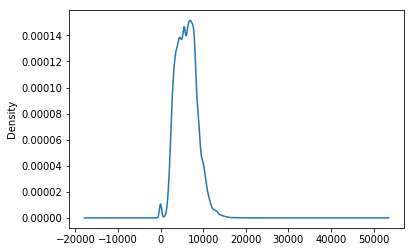

In [65]:
df['MMRCurrentAuctionAveragePrice'].plot.kde()

In [66]:
df['StandardizedMMRCurrentAuctionAveragePrice'] = np.nan
vehAgeMean = df['MMRCurrentAuctionAveragePriceFill'].mean()
vehAgeStd = df['MMRCurrentAuctionAveragePriceFill'].std()
for index, price in df['MMRCurrentAuctionAveragePriceFill'].iteritems():
    df.loc[index, 'StandardizedMMRCurrentAuctionAveragePrice']=np.sqrt(price)


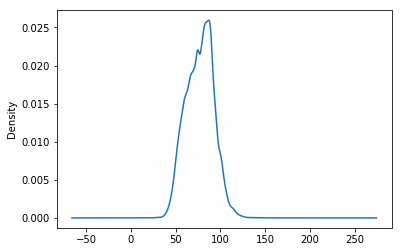

In [67]:
df['StandardizedMMRCurrentAuctionAveragePrice'].plot.kde()

In [6]:
df['AUCGUART'].value_counts()

GREEN    3340
RED        79
Name: AUCGUART, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000018ACCA20>,
      dtype=object)

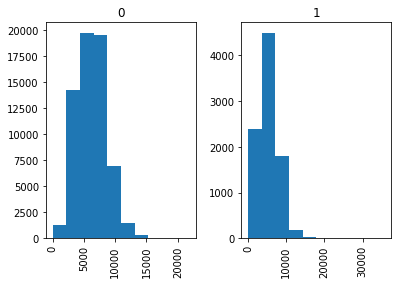

In [69]:
df['MMRCurrentAuctionAveragePrice'].hist(by=df['IsBadBuy'])

(array([ 64007.,   8976.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 9 Patch objects>)

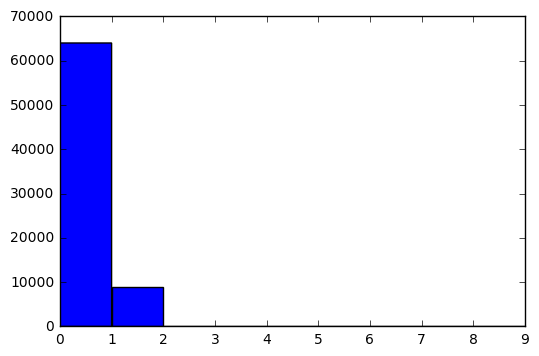

In [92]:
plt.hist(df['IsBadBuy'], bins=range(0,10), range=(0, 20))

In [70]:
#discretize the continuous variable into bins
hist, bins = np.histogram(df['MMRAcquisitionAuctionCleanPriceFill'], bins=range(int(min(df['MMRCurrentRetailCleanPrice'])),int(max(df['MMRCurrentRetailCleanPrice'])), 2500))
print hist, bins

[  264 13772 23966 23822  8451  2144   440    83    23     8     2     2
     2     0     4     0] [    0  2500  5000  7500 10000 12500 15000 17500 20000 22500 25000 27500
 30000 32500 35000 37500 40000]


(array([2.6400e+02, 1.3772e+04, 2.3966e+04, 2.3822e+04, 8.4510e+03,
        2.1440e+03, 4.4000e+02, 8.3000e+01, 2.3000e+01, 8.0000e+00,
        2.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00, 4.0000e+00,
        0.0000e+00]),
 array([    0,  2500,  5000,  7500, 10000, 12500, 15000, 17500, 20000,
        22500, 25000, 27500, 30000, 32500, 35000, 37500, 40000]),
 <a list of 16 Patch objects>)

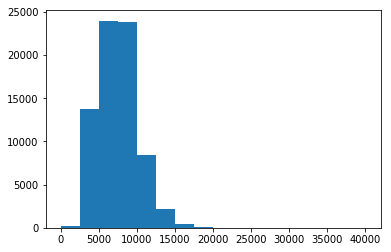

In [71]:
plt.hist(df['MMRAcquisitionAuctionCleanPriceFill'], bins=range(int(min(df['MMRCurrentRetailCleanPrice'])),int(max(df['MMRCurrentRetailCleanPrice'])), 2500))

(array([5.6000e+01, 6.5310e+03, 1.7791e+04, 2.1238e+04, 1.7399e+04,
        6.8280e+03, 2.2450e+03, 6.6400e+02, 1.6200e+02, 3.4000e+01,
        1.7000e+01, 8.0000e+00, 1.0000e+00, 2.0000e+00, 3.0000e+00,
        0.0000e+00, 0.0000e+00, 4.0000e+00]),
 array([    0.        ,  2047.72222222,  4095.44444444,  6143.16666667,
         8190.88888889, 10238.61111111, 12286.33333333, 14334.05555556,
        16381.77777778, 18429.5       , 20477.22222222, 22524.94444444,
        24572.66666667, 26620.38888889, 28668.11111111, 30715.83333333,
        32763.55555556, 34811.27777778, 36859.        ]),
 <a list of 18 Patch objects>)

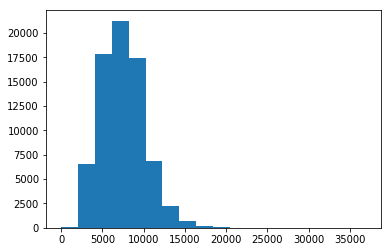

In [72]:
plt.hist(df['MMRAcquisitionAuctionCleanPriceFill'], bins='sturges', range=(0, max(df['MMRAcquisitionAuctionCleanPriceFill'])))

In [ ]:
#Below, replace missing values and map all the nominal/ordinal attributes to make the cluster analysis easier

In [73]:
#Replace missing values of Trim with the most popular value for this attribute, taking into account the manufacturer 
df['TrimFill'] = df['Trim']
for index, trim in df['TrimFill'].iteritems():
    if trim is np.nan:
        if df.loc[index, 'Make'] == 'LINCOLN':
            df.loc[index, 'TrimFill'] = 'Exe'
        elif df.loc[index, 'Make'] == 'OLDSMOBILE':
            df.loc[index, 'TrimFill'] = 'GL'
        else:
            df.loc[index, 'TrimFill'] = 'Bas'
trims = sorted(df['TrimFill'].unique())
trims_mapping = dict(zip(trims, range(0, len(trims))))
df['Trim_Val'] = df['TrimFill'].map(trims_mapping).astype(int)

In [74]:
#Reduce number of categories by assigning every  US state to its respective region
midwest = ['ND', 'SD', 'NE', 'KS', 'MN', 'IA', 'MO', 'WI', 'MI', 'IL', 'IN', 'OH']
northeast = ['NY', 'NJ', 'CT', 'VT', 'NH', 'MA', 'PA', 'NH', 'ME', 'RI']
south = ['OK', 'TX', 'AR', 'LA', 'TN', 'NC', 'KY', 'WV', 'VA', 'SC', 'GA', 'FL', 'AL', 'DE', 'MD']
west = ['HI', 'AK', 'CA', 'WA', 'OR', 'AZ', 'NM', 'ID', 'MT', 'WY', 'NV', 'UT', 'CO']
df['Regions'] = df['VNST']
for index, state in df['Regions'].iteritems():
    if state in midwest:
        df.loc[index, 'Regions'] = 'Midwest'
    elif state in northeast:
        df.loc[index, 'Regions'] = 'Northeast'
    elif state in south:
        df.loc[index, 'Regions'] = 'South'
    else:
        df.loc[index, 'Regions'] = 'West'

In [75]:
regions = sorted(df['Regions'].unique())
regions_mapping = dict(zip(regions, range(0, len(regions))))
df['Regions_Val'] = df['Regions'].map(regions_mapping).astype(int)
regions_mapping

{'Midwest': 0, 'Northeast': 1, 'South': 2, 'West': 3}

In [115]:
#Replace missing wheel type values with "Alloy"
df['WheelTypeFill'] = df['WheelType']
df['WheelTypeFill'].fillna('Alloy', inplace=True)

In [116]:
wheelTypes = sorted(df['WheelTypeFill'].unique())
wheelTypes_mapping = dict(zip(wheelTypes, range(0, len(wheelTypes))))
df['WheelType_Val'] = df['WheelTypeFill'].map(wheelTypes_mapping).astype(int)
wheelTypes_mapping

{'Alloy': 0, 'Covers': 1, 'Special': 2}

In [87]:
df['NationalityFill'] = df['Nationality']
for index, trim in df['NationalityFill'].iteritems():
    if trim is np.nan:
            df.loc[index, 'NationalityFill'] = 'AMERICAN'

In [88]:
dt['NationalityFill'] = dt['Nationality']
for index, trim in dt['NationalityFill'].iteritems():
    if trim is np.nan:
            dt.loc[index, 'NationalityFill'] = 'AMERICAN'

In [89]:
nationalities = sorted(df['NationalityFill'].unique())
nationalities_mapping = dict(zip(nationalities, range(0, len(nationalities))))
df['Nationality_Val'] = df['NationalityFill'].map(nationalities_mapping).astype(int)
nationalities_mapping

{'AMERICAN': 0, 'OTHER': 1, 'OTHER ASIAN': 2, 'TOP LINE ASIAN': 3}

In [90]:
nationalities = sorted(dt['NationalityFill'].unique())
nationalities_mapping = dict(zip(nationalities, range(0, len(nationalities))))
dt['Nationality_Val'] = dt['NationalityFill'].map(nationalities_mapping).astype(int)
nationalities_mapping

{'AMERICAN': 0, 'OTHER': 1, 'OTHER ASIAN': 2, 'TOP LINE ASIAN': 3}

In [91]:
df['Transmission'].fillna('AUTO', inplace=True)
transmissions = sorted(df['Transmission'].unique())
transmissions_mapping = dict(zip(transmissions, range(0, len(transmissions))))
df['Transmission_Val'] = df['Transmission'].map(transmissions_mapping).astype(int)

In [92]:
dt['Transmission'].fillna('AUTO', inplace=True)
transmissions = sorted(dt['Transmission'].unique())
transmissions_mapping = dict(zip(transmissions, range(0, len(transmissions))))
dt['Transmission_Val'] = dt['Transmission'].map(transmissions_mapping).astype(int)

In [93]:
vnst = sorted(df['VNST'].unique())
vnst_mapping = dict(zip(vnst, range(0, len(vnst))))
df['VNST_Val'] = df['VNST'].map(vnst_mapping).astype(int)

In [94]:
vnst = sorted(dt['VNST'].unique())
vnst_mapping = dict(zip(vnst, range(0, len(vnst))))
dt['VNST_Val'] = dt['VNST'].map(vnst_mapping).astype(int)

In [95]:
auction = sorted(df['Auction'].unique())
auction_mapping = dict(zip(auction, range(0, len(auction))))
df['Auction_Val'] = df['Auction'].map(auction_mapping).astype(int)

In [96]:
auction = sorted(dt['Auction'].unique())
auction_mapping = dict(zip(auction, range(0, len(auction))))
dt['Auction_Val'] = dt['Auction'].map(auction_mapping).astype(int)

In [97]:
df['TopThreeAmericanNameFill'] = df['TopThreeAmericanName']
topThreeAmericanNames = sorted(df['TopThreeAmericanNameFill'].unique())
# topThreeAmericanNames_mapping = dict(zip(topThreeAmericanNames, range(0, len(topThreeAmericanNames))))
topThreeAmericanNames_mapping = {'GM': 0, 'CHRYSLER': 1, 'FORD': 2, 'OTHER': 3}
df['TopThreeAmericanName_Val'] = df['TopThreeAmericanNameFill'].map(topThreeAmericanNames_mapping).astype(int)
topThreeAmericanNames_mapping

{'CHRYSLER': 1, 'FORD': 2, 'GM': 0, 'OTHER': 3}

In [98]:
dt['TopThreeAmericanNameFill'] = dt['TopThreeAmericanName']
topThreeAmericanNames = sorted(dt['TopThreeAmericanNameFill'].unique())
# topThreeAmericanNames_mapping = dict(zip(topThreeAmericanNames, range(0, len(topThreeAmericanNames))))
topThreeAmericanNames_mapping = {'GM': 0, 'CHRYSLER': 1, 'FORD': 2, 'OTHER': 3}
dt['TopThreeAmericanName_Val'] = dt['TopThreeAmericanNameFill'].map(topThreeAmericanNames_mapping).astype(int)
topThreeAmericanNames_mapping

{'CHRYSLER': 1, 'FORD': 2, 'GM': 0, 'OTHER': 3}

In [99]:
df['SizeFill'] = df['Size']
df['SizeFill'].fillna('MEDIUM', inplace=True)
sizes = sorted(df['SizeFill'].unique())
sizes_mapping = dict(zip(sizes, range(0, len(sizes))))
df['Sizes_Val'] = df['SizeFill'].map(sizes_mapping).astype(int)

In [100]:
dt['SizeFill'] = dt['Size']
dt['SizeFill'].fillna('MEDIUM', inplace=True)
sizes = sorted(dt['SizeFill'].unique())
sizes_mapping = dict(zip(sizes, range(0, len(sizes))))
dt['Sizes_Val'] = dt['SizeFill'].map(sizes_mapping).astype(int)

In [101]:
truck = ['SMALL TRUCK', 'LARGE TRUCK', 'VAN']
suv = ['LARGE SUV', 'SMALL SUV', 'MEDIUM SUV', 'CROSSOVER']
sedan = ['MEDIUM', 'LARGE', 'SPECIALTY', 'SPORTS']
hatchback = ['COMPACT']
df['Capacity'] = df['SizeFill']
for index, size in df['Capacity'].iteritems():
    if size in truck:
        df.loc[index, 'Capacity'] = 'Truck'
    elif size in suv:
        df.loc[index, 'Capacity'] = 'SUV'
    elif size in sedan:
        df.loc[index, 'Capacity'] = 'Sedan'
    else:
        df.loc[index, 'Capacity'] = 'Hatchback'

In [102]:
capacities = sorted(df['Capacity'].unique())
capacities_mapping = dict(zip(capacities, range(0, len(capacities))))
df['Capacities_Val'] = df['Capacity'].map(capacities_mapping).astype(int)
capacity_xt = pd.crosstab(df['Capacities_Val'], df['IsBadBuy'])
capacity_xt_pct = capacity_xt.div(capacity_xt.sum(1).astype(float), axis=0)

In [103]:
df['Capacity'].value_counts()

Sedan        42332
SUV          13558
Truck         9888
Hatchback     7205
Name: Capacity, dtype: int64

In [104]:
df['ColorFill'] = df['Color']
for index, trim in df['ColorFill'].iteritems():
    if trim is np.nan or trim == 'NOT AVAIL':
            df.loc[index, 'ColorFill'] = 'SILVER'

In [105]:
df['ColorFill'].value_counts()

SILVER    14977
WHITE     12123
BLUE      10347
GREY       7887
BLACK      7627
RED        6257
GOLD       5231
GREEN      3194
MAROON     2046
BEIGE      1584
BROWN       436
ORANGE      415
PURPLE      373
YELLOW      244
OTHER       242
Name: ColorFill, dtype: int64

In [106]:
colors = sorted(df['ColorFill'].unique())
colors_mapping = dict(zip(colors, range(0, len(colors))))
df['Colors_Val'] = df['ColorFill'].map(colors_mapping).astype(int)
color_xt = pd.crosstab(df['Colors_Val'], df['IsBadBuy'])
color_xt_pct = color_xt.div(color_xt.sum(1).astype(float), axis=0)

In [107]:
df['ColorFill'].value_counts()

SILVER    14977
WHITE     12123
BLUE      10347
GREY       7887
BLACK      7627
RED        6257
GOLD       5231
GREEN      3194
MAROON     2046
BEIGE      1584
BROWN       436
ORANGE      415
PURPLE      373
YELLOW      244
OTHER       242
Name: ColorFill, dtype: int64

In [108]:
makers = sorted(df['Make'].unique())
makers_mapping = dict(zip(makers, range(0, len(makers))))
df['Makers_Val'] = df['Make'].map(makers_mapping).astype(int)

In [109]:
makers = sorted(dt['Make'].unique())
makers_mapping = dict(zip(makers, range(0, len(makers))))
dt['Makers_Val'] = dt['Make'].map(makers_mapping).astype(int)

In [140]:
df_train_condensed = df.drop(['VehBCost','VehOdo','NormalizedMMRCurrentAuctionAveragePrice','VNST', 'Sizes_Val', 'RefId', 'Make', 'Model', 'PurchDate', 'Auction', 'VehYear', 'SubModel', 'Color', 'ColorFill', 'Size', 'SizeFill',  'Nationality', 'Trim', 'TrimFill', 'WheelType', 'TopThreeAmericanName', 'Transmission', 'WheelTypeID', 'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice','MMRAcquisitionRetailAveragePrice','MMRAcquisitonRetailCleanPrice','MMRCurrentAuctionAveragePrice','MMRCurrentAuctionCleanPrice','MMRCurrentRetailAveragePrice','MMRCurrentRetailCleanPrice','PRIMEUNIT', 'AUCGUART', 'BYRNO', 'VNZIP1', 'IsOnlineSale', 'WheelTypeFill', 'NationalityFill', 'TopThreeAmericanNameFill', 'Regions', 'Capacity'], axis=1)

In [144]:
#Scale all the values between 0 and 1


# for k in df_train_condensed.columns:
#     df_train_condensed[k] = min_max_scaler.fit_transform(df_train_condensed[k].values.astype(float))

In [153]:
#scale every value between 0 and 1
min_max_scaler = preprocessing.MinMaxScaler(copy=True, feature_range=(0, 1))
train_data = df_train_condensed.values
train_data = min_max_scaler.fit_transform(train_data)

In [156]:
# train_data = df_train_condensed.as_matrix(columns=df_train_condensed.columns)
# train_data

In [75]:
# apply kmeans on the training data
sse_list = list()
max_k = 20
for k in range(2,max_k):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(train_data)
    sse = kmeans.inertia_
    sse_list.append(sse)
plt.plot(range(2,max_k), sse_list)
plt.grid(True)
plt.title("SSE Distribuiton")
plt.xlabel("Number of clusters")
plt.ylabel("Sum of squared errors")


KeyboardInterrupt: 

In [87]:
initial_kmeans = KMeans(init='k-means++', n_clusters=6, n_init=10, max_iter=120)
initial_kmeans.fit(train_data)
hist, bins = np.histogram(initial_kmeans.labels_, bins=range(0, len(set(initial_kmeans.labels_)) + 1))
print 'centers', initial_kmeans.cluster_centers_
print 'labels', dict(zip(bins, hist))
print 'sse', initial_kmeans.inertia_
print df_train_condensed.columns
print 'silhouette', silhouette_score(train_data, initial_kmeans.labels_, random_state=100, sample_size=20000)

centers [[  3.78863607e-14   5.23337562e-01   9.19837506e-02   5.30409050e-14
    7.92763506e-01   1.88811166e-01   2.00085271e-01]
 [ -1.54876112e-14   3.83781840e-01   1.22825039e-01   5.09599405e-01
    1.69815447e-01   1.76328666e-01   1.89930034e-01]
 [  3.37230244e-15   4.86338619e-01   1.44794647e-01   4.34374758e-14
    1.47588687e-01   1.92438087e-01   2.04462753e-01]
 [  1.00000000e+00   5.77999052e-01   9.15814785e-02   1.28449502e-01
    8.17354196e-01   1.59002974e-01   1.71588034e-01]
 [  1.00000000e+00   5.30326151e-01   1.50889313e-01   1.78538729e-01
    1.66330953e-01   1.56723205e-01   1.69864778e-01]
 [  2.75751644e-14   4.48362480e-01   4.70068245e-02   5.13330876e-01
    8.95646476e-01   1.56003229e-01   1.69343915e-01]]
labels {0: 12612, 1: 22866, 2: 20390, 3: 3515, 4: 5461, 5: 8139}
sse 6223.91666102
Index([u'IsBadBuy', u'VehicleAge', u'WarrantyCost', u'WheelType_Val',
       u'TopThreeAmericanName_Val', u'MMRAcquisitionAuctionCleanPriceFill',
       u'MMRCurren

([<matplotlib.axis.YTick at 0xe900eb8>,
 <a list of 8 Text yticklabel objects>)

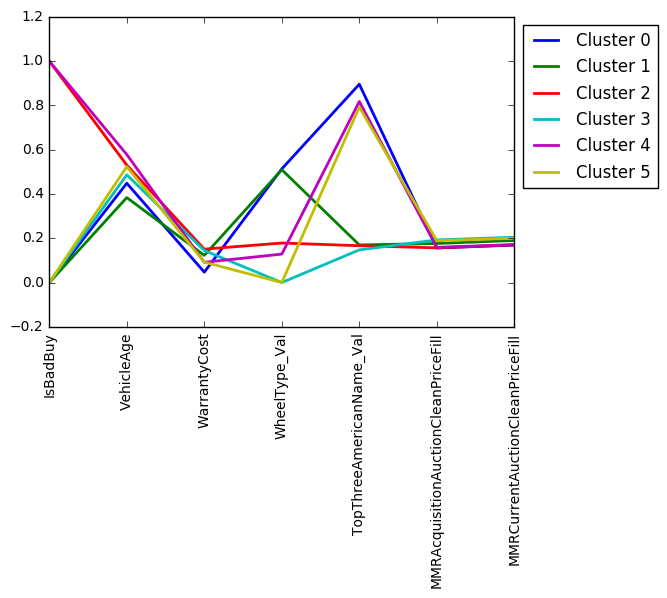

In [86]:
for i in range(0, 6):
    plt.plot(range(0, 7), initial_kmeans.cluster_centers_[i], label='Cluster %s' % i, linewidth=2)
plt.xticks(range(0, 7), list(df_train_condensed.columns), rotation=90)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.yticks(np.arange(-0.2, 1.4, 0.2))

In [90]:
df_clusters = df_train_condensed
df_clusters['Labels'] = initial_kmeans.labels_
len(initial_kmeans.labels_)

72983

In [120]:
pd.set_option('display.max_columns', 500)
df_clusters.describe()

,IsBadBuy,VehicleAge,WarrantyCost,WheelType_Val,TopThreeAmericanName_Val,MMRAcquisitionAuctionCleanPriceFill,MMRCurrentAuctionCleanPriceFill,Labels
count,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000
mean,0.122988,0.464072,0.115773,0.236452,0.383126,0.178418,0.200480,2.690777
std,0.328425,0.190246,0.085112,0.259788,0.357196,0.073087,0.072826,1.762198
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.333333,0.053297,0.000000,0.000000,0.123299,0.146803,1.000000
50%,0.000000,0.444444,0.098493,0.000000,0.333333,0.175558,0.198432,3.000000
75%,0.000000,0.555556,0.165009,0.500000,0.666667,0.222620,0.244472,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


In [149]:
df_clusters[df_clusters['Labels']==2].describe()

,IsBadBuy,VehicleAge,WarrantyCost,WheelType_Val,TopThreeAmericanName_Val,MMRAcquisitionAuctionCleanPriceFill,MMRCurrentAuctionCleanPriceFill,Labels
count,22866.0,22866.000000,22866.000000,22866.000000,22866.000000,22866.000000,22866.000000,22866.0
mean,0.0,0.383782,0.122825,0.509599,0.169815,0.176329,0.199524,0.0
std,0.0,0.175823,0.083137,0.068613,0.166641,0.057554,0.058789,0.0
min,0.0,0.111111,0.000000,0.500000,0.000000,0.008971,0.000000,0.0
25%,0.0,0.222222,0.065094,0.500000,0.000000,0.136685,0.160429,0.0
50%,0.0,0.333333,0.107021,0.500000,0.333333,0.180994,0.205296,0.0
75%,0.0,0.444444,0.171120,0.500000,0.333333,0.214599,0.237744,0.0
max,0.0,1.000000,0.774730,1.000000,0.333333,0.591789,0.565479,0.0


In [153]:
df_clusters[df_clusters['Labels']==4].describe()

,IsBadBuy,VehicleAge,WarrantyCost,WheelType_Val,TopThreeAmericanName_Val,MMRAcquisitionAuctionCleanPriceFill,MMRCurrentAuctionCleanPriceFill,Labels
count,20390.0,20390.000000,20390.000000,20390.0,20390.000000,20390.000000,20390.000000,20390.0
mean,0.0,0.486339,0.144795,0.0,0.147589,0.192438,0.213453,4.0
std,0.0,0.178477,0.089385,0.0,0.165575,0.074225,0.074725,0.0
min,0.0,0.111111,0.000000,0.0,0.000000,0.028142,0.000000,4.0
25%,0.0,0.333333,0.083997,0.0,0.000000,0.135798,0.157818,4.0
50%,0.0,0.444444,0.131751,0.0,0.000000,0.190929,0.212458,4.0
75%,0.0,0.555556,0.190307,0.0,0.333333,0.241763,0.263301,4.0
max,0.0,1.000000,1.000000,0.0,0.333333,0.591789,0.549337,4.0


In [154]:
df_clusters[df_clusters['Labels']==5].describe()

,IsBadBuy,VehicleAge,WarrantyCost,WheelType_Val,TopThreeAmericanName_Val,MMRAcquisitionAuctionCleanPriceFill,MMRCurrentAuctionCleanPriceFill,Labels
count,12612.0,12612.000000,12612.000000,12612.0,12612.000000,12612.000000,12612.000000,12612.0
mean,0.0,0.523338,0.091984,0.0,0.792764,0.188811,0.209569,5.0
std,0.0,0.186287,0.056124,0.0,0.161660,0.086087,0.084247,0.0
min,0.0,0.000000,0.000000,0.0,0.666667,0.012827,0.000000,5.0
25%,0.0,0.333333,0.048749,0.0,0.666667,0.120923,0.145039,5.0
50%,0.0,0.555556,0.081865,0.0,0.666667,0.181008,0.202976,5.0
75%,0.0,0.666667,0.129477,0.0,1.000000,0.243649,0.260947,5.0
max,0.0,1.000000,0.537095,0.0,1.000000,0.641059,0.701240,5.0


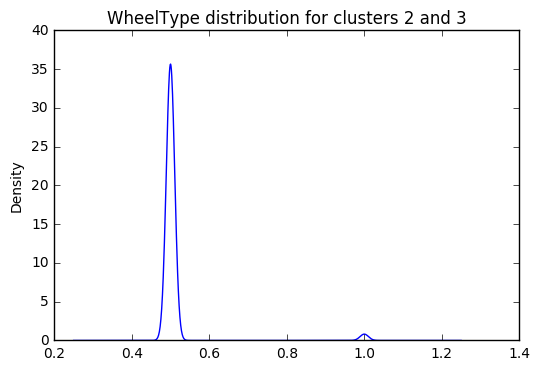

In [138]:
df_clusters[df_clusters['Labels']==5]['WheelType_Val'].plot.kde(title="WheelType distribution for clusters 2 and 3")


In [66]:
colors_xt = pd.crosstab(df_clusters['Colors_Val'], df_clusters['Labels'])
colors_xt

Labels,0,1,2,3,4,5,6
Colors_Val,,,,,,,
0.000000,473,0,60,211,417,423,0
0.071429,2242,0,354,858,2028,2145,0
0.142857,3121,0,627,1189,2357,3053,0
0.214286,116,0,12,56,104,148,0
0.285714,1308,0,342,737,1174,1670,0
0.357143,612,0,152,402,866,1162,0
0.428571,2073,10,522,911,1986,2385,0
0.500000,407,92,116,260,507,607,57
0.571429,34,110,120,34,44,26,47


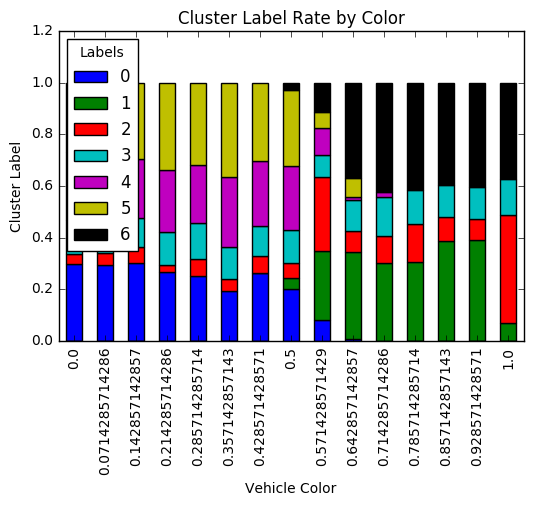

In [70]:
colors_xt_pct = colors_xt.div(colors_xt.sum(1).astype(float), axis=0)
colors_xt_pct.plot(kind='bar', stacked=True, title='Cluster Label Rate by Color')
plt.xlabel('Vehicle Color')
plt.ylabel('Cluster Label')

In [67]:
dates_xt = pd.crosstab(df_clusters['MonthPurchDate'], df_clusters['Labels'])
dates_xt

Labels,0,1,2,3,4,5,6
MonthPurchDate,,,,,,,
0.000000,7,317,219,260,0,870,419
0.043478,11,506,234,444,0,1598,852
0.086957,10,436,211,395,0,1309,671
0.130435,8,489,180,308,0,1345,600
0.173913,4,613,146,196,0,1187,425
0.217391,33,524,150,254,0,1096,465
0.260870,136,532,218,316,0,994,530
0.304348,458,685,226,406,0,921,643
0.347826,537,666,245,469,6,849,674


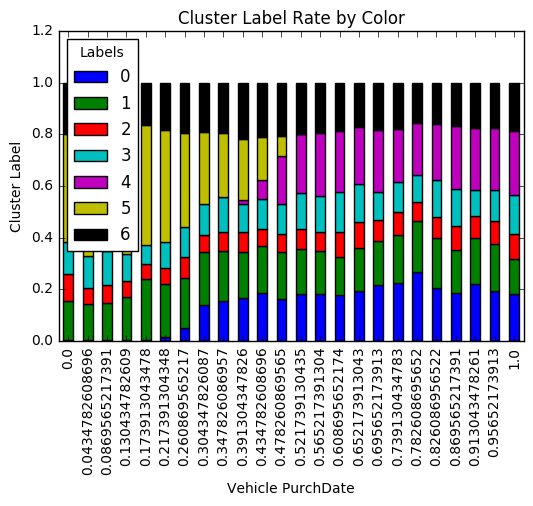

In [69]:
dates_xt_pct = dates_xt.div(dates_xt.sum(1).astype(float), axis=0)
dates_xt_pct.plot(kind='bar', stacked=True, title='Cluster Label Rate by Color')
plt.xlabel('Vehicle PurchDate')
plt.ylabel('Cluster Label')

In [90]:
# density based clustering

print 'dbscan'

dbscan = DBSCAN(eps=0.40, min_samples=20, metric='euclidean')
dbscan.fit(train_data)
# print dbscan.components_
hist, bins = np.histogram(dbscan.labels_, bins=range(-1, len(set(dbscan.labels_)) + 1))
print df_train_condensed.columns
print 'labels', dict(zip(bins, hist))
print 'silhouette', silhouette_score(train_data, dbscan.labels_, random_state=100, sample_size=20000)

dbscan
Index([u'IsBadBuy', u'VehicleAge', u'WarrantyCost', u'WheelType_Val',
       u'Nationality_Val', u'TopThreeAmericanName_Val',
       u'MMRAcquisitionAuctionCleanPriceFill',
       u'MMRCurrentAuctionCleanPriceFill'],
      dtype='object')
labels {0: 4771, 1: 28231, 2: 24877, 3: 5472, 4: 5162, 5: 1054, 6: 2142, 7: 119, 8: 513, 9: 81, 10: 537, 11: 0, -1: 24}
silhouette 0.386653230394


In [98]:
db_clusters = df_train_condensed
db_clusters['Labels'] = dbscan.labels_

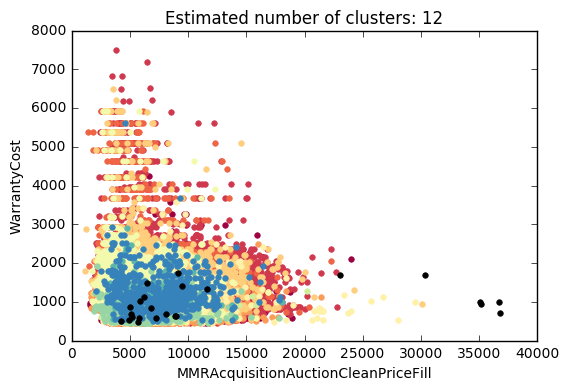

In [99]:
df_test = df_train_condensed[['WarrantyCost', 'MMRAcquisitionAuctionCleanPriceFill']].copy()
df_test['Labels'] = dbscan.labels_
# test_data = df_test.values
# x = test_data[:,1]
# y = test_data[:,0]
x = []
y = []
# z = test_data[:,2]
# ax = Axes3D()
unique_labels = set(dbscan.labels_)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise
        col = 'k'
    x = df_test[df_test['Labels']==k].values[:, 1]
    y = df_test[df_test['Labels']==k].values[:, 0]
    plt.plot(x, y, 'o', markerfacecolor=col,
             markeredgecolor=col, markersize=4)
plt.title('Estimated number of clusters: %d' % 12)
plt.xlabel('MMRAcquisitionAuctionCleanPriceFill')
plt.ylabel('WarrantyCost')
# plt.yticks(np.arange(-1, 11, 1))
plt.show()

In [100]:
db_clusters[db_clusters['Labels']==0].describe()

,IsBadBuy,VehicleAge,WarrantyCost,WheelType_Val,Nationality_Val,TopThreeAmericanName_Val,MMRAcquisitionAuctionCleanPriceFill,MMRCurrentAuctionCleanPriceFill,Labels
count,4771.0,4771.000000,4771.000000,4771.0,4771.000000,4771.0,4771.000000,4771.000000,4771.0
mean,0.0,4.666737,936.293859,0.0,2.289248,3.0,7818.565185,7708.943827,0.0
std,0.0,1.572171,393.557280,0.0,0.504247,0.0,2580.700587,2640.347560,0.0
min,0.0,0.000000,462.000000,0.0,1.000000,3.0,1535.000000,0.000000,0.0
25%,0.0,4.000000,620.000000,0.0,2.000000,3.0,5941.000000,5858.000000,0.0
50%,0.0,5.000000,837.000000,0.0,2.000000,3.0,7657.000000,7574.000000,0.0
75%,0.0,6.000000,1155.000000,0.0,3.000000,3.0,9340.000000,9197.000000,0.0
max,0.0,9.000000,4241.000000,0.0,3.000000,3.0,24015.000000,25847.000000,0.0


In [112]:
db_clusters[db_clusters['Labels']==-1].describe()

,IsBadBuy,VehicleAge,WarrantyCost,WheelType_Val,Nationality_Val,TopThreeAmericanName_Val,MMRAcquisitionAuctionCleanPriceFill,MMRCurrentAuctionCleanPriceFill,Labels
count,24.0,24.000000,24.000000,24.000000,24.000000,24.00000,24.000000,24.000000,24.0
mean,1.0,4.333333,947.416667,1.500000,2.083333,2.75000,13405.958333,12314.083333,-1.0
std,0.0,1.948615,409.856806,0.884652,0.829702,0.84699,11883.023285,11961.625482,0.0
min,1.0,1.000000,482.000000,0.000000,0.000000,0.00000,4218.000000,0.000000,-1.0
25%,1.0,2.750000,613.500000,1.500000,2.000000,3.00000,5752.250000,5609.750000,-1.0
50%,1.0,4.000000,853.000000,2.000000,2.000000,3.00000,7680.500000,6809.500000,-1.0
75%,1.0,6.000000,1173.750000,2.000000,3.000000,3.00000,14434.250000,10196.250000,-1.0
max,1.0,8.000000,1740.000000,2.000000,3.000000,3.00000,36859.000000,36859.000000,-1.0


In [37]:
df_hierarchical = df[['IsBadBuy','VehicleAge','WarrantyCost', 'Nationality_Val', 'WheelType_Val', 'MMRAcquisitionAuctionCleanPriceFill', 'MMRCurrentAuctionCleanPriceFill']].copy()
min_max_scaler = preprocessing.MinMaxScaler()
hierarchical_data = df_hierarchical.values
hierarchical_data = min_max_scaler.fit_transform(hierarchical_data)
# x = df.values
# for k in df_hierarchical.columns:
#     df_hierarchical[k] = min_max_scaler.fit_transform(df_hierarchical[k].values.astype(float))
# hierarchical_data = df_hierarchical.as_matrix(columns=df_hierarchical.columns)
# df[df['MMRAcquisitionAuctionCleanPriceFill'].isnull()]

C:\Users\Mario\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\Mario\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\Mario\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single fea

In [38]:
kmeans = KMeans(init='k-means++', n_clusters=1000, n_init=10, max_iter=120)
kmeans.fit(hierarchical_data)
hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
print 'centers', kmeans.cluster_centers_

centers [[  1.00000000e+00   6.66666667e-01   2.23467281e-01 ...,  -8.32667268e-17
    1.87601581e-01   2.08475114e-01]
 [ -1.66533454e-16   4.44444444e-01   1.75179011e-01 ...,   5.00000000e-01
    1.65886834e-01   1.86340417e-01]
 [ -1.80411242e-16   4.44444444e-01   1.42876448e-01 ...,   6.10622664e-16
    1.84295928e-01   2.06154394e-01]
 ..., 
 [  1.00000000e+00   6.11111111e-01   8.76563388e-02 ...,   5.00000000e-01
    3.07052232e-01   3.54221493e-01]
 [ -1.11022302e-16   1.11111111e-01   1.59775699e-01 ...,   5.00000000e-01
    2.56649933e-01   2.75567951e-01]
 [ -8.32667268e-17   8.88888889e-01   7.17737351e-02 ...,   5.00000000e-01
    4.85393162e-02   7.77158743e-02]]


In [76]:
normalized_centroids = min_max_scaler.fit_transform(kmeans.cluster_centers_)

In [73]:
print kmeans.labels_

[ 74 686 553 ..., 915 292 443]


In [100]:
print 'average'
average = AgglomerativeClustering(n_clusters=6, linkage='average', affinity='euclidean')
average.fit(kmeans.cluster_centers_)

hist, bins = np.histogram(average.labels_, bins=range(0, len(set(average.labels_)) + 1))
print 'labels', dict(zip(bins, hist))
print 'silhouette', silhouette_score(kmeans.cluster_centers_, average.labels_)

average
labels {0: 541, 1: 184, 2: 12, 3: 184, 4: 78, 5: 1}
silhouette 0.40935284606


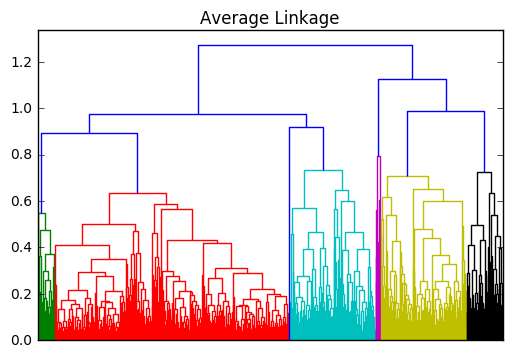

In [102]:
data_dist = pdist(kmeans.cluster_centers_, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
res = dendrogram(data_link, no_labels=True)
cutted_cluster = fcluster(data_link, 0.8, 'distance')
plt.title("Average Linkage")

In [87]:
df_hierarchical['K_Label'] = kmeans.labels_
klabel_mapping = dict(zip(kmeans.labels_, average.labels_))
df_hierarchical['Average_Label'] = df_hierarchical['K_Label'].map(klabel_mapping).astype(float)

In [88]:
df_hierarchical[df_hierarchical['Average_Label']==0.0].describe()

,IsBadBuy,VehicleAge,WarrantyCost,Nationality_Val,WheelType_Val,MMRAcquisitionAuctionCleanPriceFill,MMRCurrentAuctionCleanPriceFill,Labels,K_Label,Average_Label,Ward_Label
count,29107.000000,29107.000000,29107.000000,29107.000000,29107.000000,29107.000000,29107.000000,29107.000000,29107.000000,29107.0,29107.000000
mean,0.100423,0.459935,0.108430,0.113283,0.233054,0.175596,0.199157,0.899577,469.161645,0.0,1.927543
std,0.300568,0.175256,0.074069,0.275305,0.250426,0.068013,0.066807,0.300568,290.621826,0.0,1.000690
min,0.000000,0.111111,0.000000,0.000000,0.000000,0.015650,0.000000,0.000000,1.000000,0.0,1.000000
25%,0.000000,0.333333,0.051592,0.000000,0.000000,0.121566,0.145365,1.000000,191.000000,0.0,1.000000
50%,0.000000,0.444444,0.094230,0.000000,0.000000,0.171785,0.194959,1.000000,470.000000,0.0,1.000000
75%,0.000000,0.555556,0.148664,0.000000,0.500000,0.222200,0.245313,1.000000,707.000000,0.0,3.000000
max,1.000000,1.000000,0.774730,1.000000,1.000000,0.515608,0.570553,1.000000,999.000000,0.0,5.000000


In [99]:
print 'ward'
ward = AgglomerativeClustering(n_clusters=6, linkage='ward', affinity='euclidean')
ward.fit(kmeans.cluster_centers_)

hist, bins = np.histogram(ward.labels_, bins=range(0, len(set(ward.labels_)) + 1))
print 'labels', dict(zip(bins, hist))
print 'silhouette', silhouette_score(kmeans.cluster_centers_, ward.labels_)
# df_ward['Labels'] = ward.labels_

ward
labels {0: 186, 1: 307, 2: 99, 3: 229, 4: 88, 5: 91}
silhouette 0.410360026772


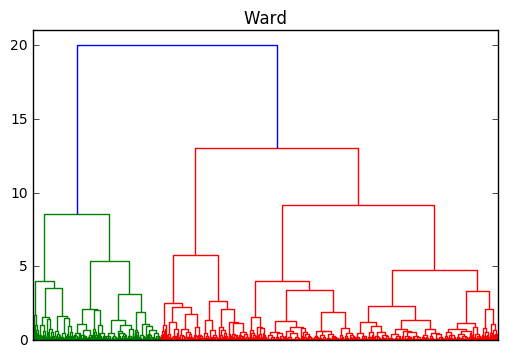

In [101]:
data_dist = pdist(kmeans.cluster_centers_, metric='euclidean')
data_link = linkage(data_dist, method='ward', metric='euclidean')
res = dendrogram(data_link, no_labels=True)
plt.title("Ward")

In [55]:
klabel_mapping = dict(zip(kmeans.labels_, ward.labels_))
df_hierarchical['Ward_Label'] = df_hierarchical['K_Label'].map(klabel_mapping).astype(float)

In [58]:
df_hierarchical[df_hierarchical['Ward_Label']==0.0].describe()

,IsBadBuy,VehicleAge,WarrantyCost,Nationality_Val,WheelType_Val,MMRAcquisitionAuctionCleanPriceFill,MMRCurrentAuctionCleanPriceFill,Labels,K_Label,Average_Label,Ward_Label
count,8729.000000,8729.000000,8729.000000,8729.000000,8729.000000,8729.000000,8729.000000,8729.000000,8729.000000,8729.000000,8729.0
mean,0.117310,0.472715,0.104271,0.124107,0.240692,0.172079,0.195020,0.882690,461.663306,2.979952,0.0
std,0.321808,0.187702,0.069252,0.278575,0.249841,0.063176,0.062302,0.321808,288.473297,0.140173,0.0
min,0.000000,0.111111,0.000000,0.000000,0.000000,0.023195,0.000000,0.000000,6.000000,2.000000,0.0
25%,0.000000,0.333333,0.053297,0.000000,0.000000,0.125870,0.150954,1.000000,216.000000,3.000000,0.0
50%,0.000000,0.444444,0.092524,0.000000,0.000000,0.172205,0.195095,1.000000,483.000000,3.000000,0.0
75%,0.000000,0.666667,0.147953,0.000000,0.500000,0.212838,0.232833,1.000000,661.000000,3.000000,0.0
max,1.000000,1.000000,0.507391,1.000000,0.500000,0.379622,0.408882,1.000000,989.000000,3.000000,0.0


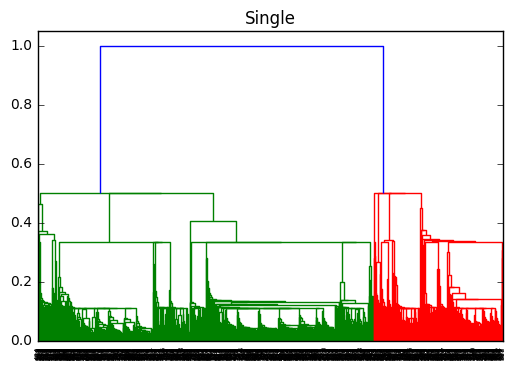

In [94]:
data_dist = pdist(kmeans.cluster_centers_, metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')
res = dendrogram(data_link)
plt.title("Single")

In [46]:
print 'complete'
ward = AgglomerativeClustering(n_clusters=6, linkage='complete', affinity='euclidean')
ward.fit(kmeans.cluster_centers_)

hist, bins = np.histogram(ward.labels_, bins=range(0, len(set(ward.labels_)) + 1))
print 'labels', dict(zip(bins, hist))
print 'silhouette', silhouette_score(kmeans.cluster_centers_, ward.labels_)
len(kmeans.cluster_centers_)

complete
labels {0: 167, 1: 185, 2: 544, 3: 24, 4: 74, 5: 6}
silhouette 0.383271643051


1000

In [97]:
print 'complete'
complete = AgglomerativeClustering(n_clusters=6, linkage='complete', affinity='euclidean')
complete.fit(kmeans.cluster_centers_)

hist, bins = np.histogram(complete.labels_, bins=range(0, len(set(complete.labels_)) + 1))
print 'labels', dict(zip(bins, hist))
print 'silhouette', silhouette_score(kmeans.cluster_centers_, complete.labels_)
len(kmeans.cluster_centers_)

complete
labels {0: 418, 1: 181, 2: 31, 3: 286, 4: 76, 5: 8}
silhouette 0.242839123736


1000

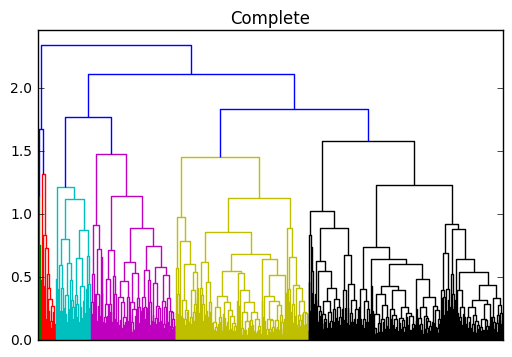

In [98]:
data_dist = pdist(kmeans.cluster_centers_, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, no_labels=True)
plt.title("Complete")

In [92]:
klabel_mapping = dict(zip(kmeans.labels_, complete.labels_))
df_hierarchical['Complete_Label'] = df_hierarchical['K_Label'].map(klabel_mapping).astype(float)

In [93]:
df_hierarchical[df_hierarchical['Complete_Label']==0.0].describe()

,IsBadBuy,VehicleAge,WarrantyCost,Nationality_Val,WheelType_Val,MMRAcquisitionAuctionCleanPriceFill,MMRCurrentAuctionCleanPriceFill,Labels,K_Label,Average_Label,Ward_Label,Complete_Label
count,20695.000000,20695.000000,20695.000000,20695.000000,20695.000000,20695.000000,20695.000000,20695.000000,20695.000000,20695.000000,20695.000000,20695.0
mean,0.100846,0.454688,0.102367,0.127422,0.257381,0.175785,0.199745,0.899154,459.361198,0.690747,0.802078,0.0
std,0.301131,0.186624,0.071161,0.289552,0.250332,0.064519,0.063403,0.301131,289.028931,1.259674,0.469692,0.0
min,0.000000,0.111111,0.000000,0.000000,0.000000,0.015650,0.000000,0.000000,4.000000,0.000000,0.000000,0.0
25%,0.000000,0.333333,0.051592,0.000000,0.000000,0.126541,0.150194,1.000000,222.000000,0.000000,1.000000,0.0
50%,0.000000,0.444444,0.088687,0.000000,0.500000,0.176369,0.201036,1.000000,467.000000,0.000000,1.000000,0.0
75%,0.000000,0.555556,0.147527,0.000000,0.500000,0.219783,0.243794,1.000000,660.000000,0.000000,1.000000,0.0
max,1.000000,1.000000,0.774730,1.000000,1.000000,0.462398,0.528935,1.000000,999.000000,3.000000,2.000000,0.0


In [40]:
# hierarchical clustering
connectivity = kneighbors_graph(hierarchical_data, n_neighbors=100, include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)

In [56]:
print 'ward'
ward = AgglomerativeClustering(n_clusters=6, linkage='ward', affinity='euclidean',
                                   connectivity=connectivity)
ward.fit(hierarchical_data)

hist, bins = np.histogram(ward.labels_, bins=range(0, len(set(ward.labels_)) + 1))
print 'labels', dict(zip(bins, hist))
print 'silhouette', silhouette_score(hierarchical_data, ward.labels_, random_state=100, sample_size=20000)
df_ward = df_hierarchical
df_ward['Labels'] = ward.labels_

ward
labels {0: 7410, 1: 28231, 2: 5591, 3: 25414, 4: 1566, 5: 4771}
silhouette 0.525691910682


In [53]:
df_ward = df_hierarchical
df_ward['Labels'] = ward.labels_

In [57]:
df_ward[df_ward['Labels']==0].describe()

,IsBadBuy,VehicleAge,WarrantyCost,Nationality_Val,WheelType_Val,MMRAcquisitionAuctionCleanPriceFill,MMRCurrentAuctionCleanPriceFill,Labels
count,7410.0,7410.000000,7410.000000,7410.000000,7410.000000,7410.000000,7410.000000,7410.0
mean,1.0,0.549618,0.141882,0.001035,0.155466,0.156287,0.179177,0.0
std,0.0,0.196883,0.097542,0.018543,0.242975,0.076724,0.075251,0.0
min,1.0,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1.0,0.444444,0.076890,0.000000,0.000000,0.095946,0.122019,0.0
50%,1.0,0.555556,0.123081,0.000000,0.000000,0.144189,0.167340,0.0
75%,1.0,0.666667,0.184906,0.000000,0.500000,0.202491,0.224667,0.0
max,1.0,1.000000,0.857021,0.333333,1.000000,0.995584,0.989663,0.0


In [41]:
print 'average linkage'
average = AgglomerativeClustering(n_clusters=6, linkage='average', affinity='euclidean',
                                   connectivity=connectivity)
average.fit(hierarchical_data)

hist, bins = np.histogram(average.labels_, bins=range(0, len(set(average.labels_)) + 1))
print 'labels', dict(zip(bins, hist))
print 'silhouette', silhouette_score(hierarchical_data, average.labels_, random_state=100, sample_size=20000)
df_average = df_hierarchical
df_average['Labels'] = average.labels_

average linkage


C:\Users\Mario\Anaconda2\lib\site-packages\sklearn\cluster\hierarchical.py:443: UserWarning: the number of connected components of the connectivity matrix is 3 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_components = _fix_connectivity(X, connectivity)


labels {0: 8931, 1: 64007, 2: 18, 3: 3, 4: 3, 5: 21}
silhouette 0.495334063885


In [60]:
df_average = df_hierarchical
df_average['Labels'] = average.labels_

In [43]:
df_average[df_average['Labels']==0].describe()

,IsBadBuy,VehicleAge,WarrantyCost,Nationality_Val,WheelType_Val,MMRAcquisitionAuctionCleanPriceFill,MMRCurrentAuctionCleanPriceFill,Labels
count,8931.0,8931.000000,8931.000000,8931.000000,8931.000000,8931.000000,8931.000000,8931.0
mean,1.0,0.549746,0.128019,0.132572,0.157709,0.156072,0.178780,0.0
std,0.0,0.195884,0.096687,0.297710,0.241917,0.074348,0.073131,0.0
min,1.0,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1.0,0.444444,0.065094,0.000000,0.000000,0.097826,0.123471,0.0
50%,1.0,0.555556,0.111001,0.000000,0.000000,0.144678,0.167964,0.0
75%,1.0,0.666667,0.172115,0.000000,0.500000,0.201520,0.223310,0.0
max,1.0,1.000000,0.857021,1.000000,1.000000,0.646760,0.650859,0.0


In [42]:
print 'complete linkage'
complete = AgglomerativeClustering(n_clusters=6, linkage='complete', affinity='euclidean',
                                   connectivity=connectivity)
complete.fit(hierarchical_data)

hist, bins = np.histogram(complete.labels_, bins=range(0, len(set(complete.labels_)) + 1))
print 'labels', dict(zip(bins, hist))
print 'silhouette', silhouette_score(hierarchical_data, complete.labels_, random_state=100, sample_size=20000)
df_complete = df_hierarchical
df_complete['Labels'] = complete.labels_

complete linkage
labels {0: 8950, 1: 8, 2: 64007, 3: 3, 4: 3, 5: 12}
silhouette 0.504392885639


In [67]:
df_complete = df_hierarchical
df_complete['Labels'] = complete.labels_

In [68]:
df_complete[df_complete['Labels']==0].describe()

,IsBadBuy,VehicleAge,WarrantyCost,Nationality_Val,WheelType_Val,MMRAcquisitionAuctionCleanPriceFill,MMRCurrentAuctionCleanPriceFill,Labels
count,8950.0,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.0
mean,1.0,0.549758,0.127883,0.133929,0.159385,0.156123,0.178827,0.0
std,0.0,0.195838,0.096666,0.298932,0.244594,0.074390,0.073171,0.0
min,1.0,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1.0,0.444444,0.063530,0.000000,0.000000,0.097875,0.123498,0.0
50%,1.0,0.555556,0.111001,0.000000,0.000000,0.144678,0.167951,0.0
75%,1.0,0.666667,0.171120,0.000000,0.500000,0.201520,0.223371,0.0
max,1.0,1.000000,0.857021,1.000000,1.000000,0.646760,0.650859,0.0


In [ ]:
#Below, association rule mining is performed by impementing the apriori algorithm

In [25]:
def call_apriori(fileinput, fileoutput, delimiter=',', target_type='s', 
                 min_nbr_items=1, min_sup=2, min_conf=2):
    # apriori
    # -t# {m: maximal, c: closed, s: frequent, r: association rules}
    # -m# minimum number of items per item set/association rule
    # -s# minimum support of an item set, positive: percentage, negative: absolute
    # -c# minimum confidence rule percentage
    # -b# line delimiter (,)
    # The default additional information output format for rules is " (%X, %C)"
    # %X relative body set support as a percentage
    # %C rule confidence as a percentage
    # %L lift

    if target_type == 'r':
        call_cmd = ['apriori', '-b%s' % delimiter, '-t%s' % target_type, '-m%s' % min_nbr_items, 
                    '-s%s' % min_sup, '-c%s' % min_conf, '-v (%X, %C, %L)', 
                    fileinput, fileoutput]
    else:
        call_cmd = ['apriori', '-b%s' % delimiter, '-t%s' % target_type, 
                           '-m%s' % min_nbr_items, '-s%s' % min_sup, fileinput, fileoutput]

    ret = subprocess.call(call_cmd, stdout=open('apriori_stdout.txt', 'w'), 
                          stderr=open('apriori_stderr.txt', 'w'), shell=True)
    return ret

In [26]:
def read_rules(filename):
    data = open(filename, 'r')
    rules = list()
    for row in data:
        fileds = row.rstrip('\n\r').split(' <- ')
        cons = fileds[0]
        other = fileds[1].split(' (')
        ant = other[0].split(' ')
        other2 = other[1].split(', ')
        sup = float(other2[0])
        conf = float(other2[1])
        lift = float(other2[2].replace(')', ''))
        rule = {
            'ant': ant,
            'cons': cons,
            'sup': sup,
            'conf': conf,
            'lift': lift
        }
        rules.append(rule)
    data.close()
    return rules

In [45]:
# badToGoodRatio = []
# overallCount = 0.0
# badBuyCount = 0.0
# goodBuyCount = 0.0
# reachedMaxRange = False
# rangeLimit = 1000
# A=df['WarrantyCost'].copy()
# A.sort_values(ascending=True, inplace=True)
# for index, price in A.iteritems():
#     if price < rangeLimit:
#         if df.loc[index, 'IsBadBuy'] == 0:
#             goodBuyCount = goodBuyCount + 1.0
#         else:
#             badBuyCount = badBuyCount+1.0
#     elif price==rangeLimit:
#         if price == max(A):
#             if df.loc[index, 'IsBadBuy'] == 0:
#                 goodBuyCount = goodBuyCount + 1.0
#             else:
#                 badBuyCount = badBuyCount+1.0
#         else:
#             badToGoodRatio.append([rangeLimit, '-->', badBuyCount, goodBuyCount])
#             overallCount = overallCount+ badBuyCount + goodBuyCount
#             badBuyCount = 0.0
#             goodBuyCount = 0.0
#             rangeLimit = rangeLimit + 1000
#             if rangeLimit > max(A):
#                 rangeLimit = max(A)
            
#             if df.loc[index, 'IsBadBuy'] == 0:
#                 goodBuyCount = goodBuyCount + 1.0
#             else:
#                 badBuyCount = badBuyCount+1.0
#     else:
#         badToGoodRatio.append([rangeLimit, '-->', badBuyCount, goodBuyCount])
#         rangeLimit = rangeLimit + 1000
        
        
#         if rangeLimit > max(A):
#             rangeLimit = max(A)
#         if df.loc[index, 'IsBadBuy'] == 0:
#             goodBuyCount = goodBuyCount + 1.0
#         else:
#             badBuyCount = badBuyCount+1.0
# badToGoodRatio.append([rangeLimit, '-->', badBuyCount, goodBuyCount])
# overallCount = overallCount + badBuyCount + goodBuyCount
# print rangeLimit
# for elem in badToGoodRatio:
#     print elem
# print overallCount

7498
[2000, '-->', 2935.0, 24245.0]
[3000, '-->', 7771.0, 57934.0]
[3000, '-->', 8835.0, 63450.0]
[5000, '-->', 45.0, 187.0]
[6000, '-->', 84.0, 387.0]
[7000, '-->', 139.0, 548.0]
[8000, '-->', 141.0, 555.0]
[7498, '-->', 141.0, 557.0]
72983.0


In [ ]:
# badGood = []
# overallCount = 0.0
# badBuyCount = 0.0
# goodBuyCount = 0.0
# reachedMaxRange = False
# rangeLimit = 1000
# A=df['WarrantyCost'].copy()
# A.sort_values(ascending=True, inplace=True)
    
# for index, price in A.iteritems():
    
#     if df.loc[index, 'IsBadBuy'] == 0:
#             goodBuyCount = goodBuyCount + 1.0
#         else:
#             badBuyCount = badBuyCount+1.0
    
    

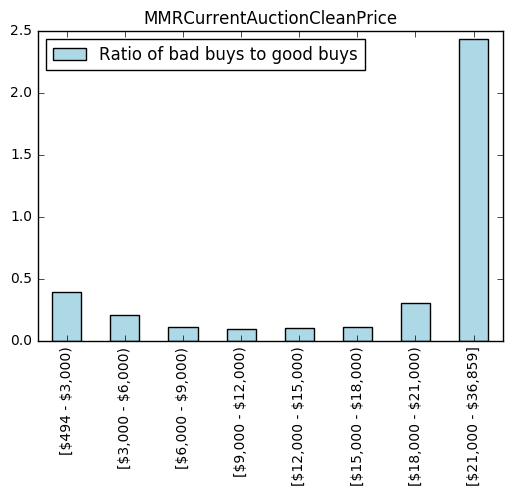

In [642]:
# Discretize MMRCurrentAuctionCleanPrice
orderedDict = OrderedDict()
priceRange = [3000, 6000, 9000, 12000, 150000, 18000, 21000, 24000]
sPriceRange = pd.Series(priceRange, name='Price Range')
orderedDict['[\$494 - \$3,000)'] = 0.39
orderedDict['[\$3,000 - \$6,000)'] = 0.21
orderedDict['[\$6,000 - \$9,000)'] = 0.11
orderedDict['[\$9,000 - \$12,000)'] = 0.09
orderedDict['[\$12,000 - \$15,000)'] = 0.10
orderedDict['[\$15,000 - \$18,000)'] = 0.11
orderedDict['[\$18,000 - \$21,000)'] = 0.30
orderedDict['[\$21,000 - \$36,859]'] = 2.43
sBadToGoodRatio = pd.Series(orderedDict, name='Ratio of bad buys to good buys')
dfBadToGoodRatio = pd.DataFrame(sBadToGoodRatio)
dfBadToGoodRatio.plot(kind='Bar', color='lightblue')
plt.title("MMRCurrentAuctionCleanPrice")

In [157]:
# dt_train = dt.drop(['Transmission_Val','VNST', 'RefId', 'Make', 'Model', 'PurchDate', 'Auction', 'VehYear', 'SubModel', 'Color', 'Size', 'Nationality', 'Trim',  'WheelType', 'TopThreeAmericanName', 'Transmission', 'WheelTypeID', 'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice','MMRAcquisitionRetailAveragePrice','MMRAcquisitonRetailCleanPrice','MMRCurrentAuctionAveragePrice','MMRCurrentAuctionCleanPrice','MMRCurrentRetailAveragePrice','MMRCurrentRetailCleanPrice','PRIMEUNIT', 'AUCGUART', 'BYRNO', 'IsOnlineSale', 'WheelTypeFill', 'TopThreeAmericanNameFill'], axis=1)
# dt_train.dtypes

In [36]:
df_train_condensed['MMRPriceDiff'] = df_train_condensed['MMRAcquisitionAuctionCleanPriceFill'].copy()
for aprice, cprice in zip(df_train_condensed['MMRAcquisitionAuctionCleanPriceFill'].iteritems(), df_train_condensed['MMRCurrentAuctionCleanPriceFill'].iteritems()):
    if (aprice[1] - cprice[1])<0:
        df_train_condensed.loc[aprice[0], 'MMRPriceDiff'] = -1
    elif (aprice[1] - cprice[1])==0:
        df_train_condensed.loc[aprice[0], 'MMRPriceDiff'] = 0
    else:
        df_train_condensed.loc[aprice[0], 'MMRPriceDiff'] = 1

In [37]:
dt_train['MMRPriceDiff'] = dt_train['MMRAcquisitionAuctionCleanPriceFill'].copy()
for aprice, cprice in zip(dt_train['MMRAcquisitionAuctionCleanPriceFill'].iteritems(), dt_train['MMRCurrentAuctionCleanPriceFill'].iteritems()):
    if (aprice[1] - cprice[1])<0:
        dt_train.loc[aprice[0], 'MMRPriceDiff'] = -1
    elif (aprice[1] - cprice[1])==0:
        dt_train.loc[aprice[0], 'MMRPriceDiff'] = 0
    else:
        dt_train.loc[aprice[0], 'MMRPriceDiff'] = 1

In [25]:
count = 0
for index, diff in df_train_condensed['MMRPriceDiff'].iteritems():
    if diff == 1 and df_train_condensed.loc[index, 'IsBadBuy'] == 1:
        count = count + 1
print count

3578


In [21]:
len(df_train_condensed[df_train_condensed['MMRPriceDiff']==0.0])

8260

In [297]:
total_counter = 0.0
isbadbuy_counter = 0.0
for index, price in df_train_condensed['MMRPriceDiff'].iteritems():
    if price == 0.0:
        total_counter = total_counter + 1
        if df_train_condensed.loc[index, 'IsBadBuy'] == 1:
            isbadbuy_counter = isbadbuy_counter + 1.0
    
print isbadbuy_counter/total_counter
print len(df_train_condensed[df_train_condensed['MMRPriceDiff']==0.0])

0.243099273608
8260


In [38]:
MPDlables = [100, 103, 106, 109, 112, 115, 118, int(max(df_train_condensed['MonthPurchDate']))]
# AACPlabels = [3000, 6000, 9000, 12000, 15000, 18000, int(max(df_train_condensed['MMRAcquisitionAuctionCleanPriceFill']))]
CACPlabels = [3000, 6000, 9000, 12000, 15000, 18000, int(max(df_train_condensed['MMRCurrentAuctionCleanPriceFill']))]
# PDFlabels = [-1, 0, 1]
WClabels = [1000, 2000, 3000, 4000, 5000, 6000, int(max(df_train_condensed['WarrantyCost']))]
VBClabels = [4000, 7000, 10000, 13000, 16000, int(max(df_train_condensed['VehBCost']))]
CRAPlabels = [3000, 6000, 9000, 12000, 15000, 18000, int(max(df_train_condensed['MMRCurrentRetailAveragePriceFill']))]

In [39]:
max(df_train_condensed['WarrantyCost'])

7498

In [39]:
df_train_condensed['MonthPurchDateGroup'] = \
pd.cut(df_train_condensed['MonthPurchDate'], \
          bins=[min(df_train_condensed['MonthPurchDate']), 100.0, 103.0, 106.0, 109.0, 112.0, 115.0, 118.0, max(df_train_condensed['MMRAcquisitionAuctionCleanPriceFill'])], right=False, \
          labels=MPDlables)
df_train_condensed['MMRCurrentAuctionCleanPriceGroup'] = \
pd.cut(df_train_condensed['MMRCurrentAuctionCleanPriceFill'], \
          bins=[min(df_train_condensed['MMRCurrentAuctionCleanPriceFill']), 3000.0, 6000.0, 9000.0, 12000.0, 15000.0, 18000.0, max(df_train_condensed['MMRCurrentAuctionCleanPriceFill'])], right=False, \
          labels=CACPlabels)

df_train_condensed['WarrantyCostGroup'] = \
pd.cut(df_train_condensed['WarrantyCost'], \
          bins=[min(df_train_condensed['WarrantyCost']), 1000.0, 2000.0, 3000.0, 4000.0, 5000.0, 6000.0, max(df_train_condensed['WarrantyCost'])], right=False, \
          labels=WClabels)
df_train_condensed['VehBCostGroup'] = \
pd.cut(df_train_condensed['VehBCost'], \
          bins=[min(df_train_condensed['VehBCost']), 4000.0, 7000.0, 10000.0, 13000.0, 16000.0, max(df_train_condensed['VehBCost'])], right=False, \
          labels=VBClabels)
df_train_condensed['MMRCurrentRetailAveragePriceGroup'] = \
pd.cut(df_train_condensed['MMRCurrentRetailAveragePriceFill'], \
          bins=[min(df_train_condensed['MMRCurrentRetailAveragePriceFill']), 3000.0, 6000.0, 9000.0, 12000.0, 15000.0, 18000.0, max(df_train_condensed['MMRCurrentRetailAveragePriceFill'])], right=False, \
          labels=CRAPlabels)

In [40]:
dt_train['MonthPurchDateGroup'] = \
pd.cut(dt_train['MonthPurchDate'], \
          bins=[min(dt_train['MonthPurchDate']), 100.0, 103.0, 106.0, 109.0, 112.0, 115.0, 118.0, max(dt_train['MMRAcquisitionAuctionCleanPriceFill'])], right=False, \
          labels=MPDlables)
dt_train['MMRCurrentAuctionCleanPriceGroup'] = \
pd.cut(dt_train['MMRCurrentAuctionCleanPriceFill'], \
          bins=[min(dt_train['MMRCurrentAuctionCleanPriceFill']), 3000.0, 6000.0, 9000.0, 12000.0, 15000.0, 18000.0, max(dt_train['MMRCurrentAuctionCleanPriceFill'])], right=False, \
          labels=CACPlabels)
dt_train['WarrantyCostGroup'] = \
pd.cut(dt_train['WarrantyCost'], \
          bins=[min(dt_train['WarrantyCost']), 1000.0, 2000.0, 3000.0, 4000.0, 5000.0, 6000.0, max(dt_train['WarrantyCost'])], right=False, \
          labels=WClabels)
dt_train['VehBCostGroup'] = \
pd.cut(dt_train['VehBCost'], \
          bins=[min(dt_train['VehBCost']), 4000.0, 7000.0, 10000.0, 13000.0, 16000.0, max(dt_train['VehBCost'])], right=False, \
          labels=VBClabels)
dt_train['MMRCurrentRetailAveragePriceGroup'] = \
pd.cut(dt_train['MMRCurrentRetailAveragePriceFill'], \
          bins=[min(dt_train['MMRCurrentRetailAveragePriceFill']), 3000.0, 6000.0, 9000.0, 12000.0, 15000.0, 18000.0, max(dt_train['MMRCurrentRetailAveragePriceFill'])], right=False, \
          labels=CRAPlabels)

In [41]:
MPDmaxIndex = df_train_condensed[df_train_condensed['MonthPurchDate']==max(df_train_condensed['MonthPurchDate'])].index.tolist()
df_train_condensed['MonthPurchDateGroup'][MPDmaxIndex[0]] = MPDlables[7]

CACPmaxIndex = df_train_condensed[df_train_condensed['MMRCurrentAuctionCleanPriceFill']==max(df_train_condensed['MMRCurrentAuctionCleanPriceFill'])].index.tolist()
df_train_condensed['MMRCurrentAuctionCleanPriceGroup'][CACPmaxIndex[0]] = CACPlabels[6]

WCmaxIndex = df_train_condensed[df_train_condensed['WarrantyCost']==max(df_train_condensed['WarrantyCost'])].index.tolist()
df_train_condensed['WarrantyCostGroup'][WCmaxIndex[0]] =  WClabels[6]

VBCmaxIndex = df_train_condensed[df_train_condensed['VehBCost']==max(df_train_condensed['VehBCost'])].index.tolist()
df_train_condensed['VehBCostGroup'][VBCmaxIndex[0]] =  VBClabels[5]

CRAPmaxIndex = df_train_condensed[df_train_condensed['MMRCurrentRetailAveragePriceFill']==max(df_train_condensed['MMRCurrentRetailAveragePriceFill'])].index.tolist()
df_train_condensed['MMRCurrentRetailAveragePriceGroup'][CRAPmaxIndex[0]] =  CRAPlabels[6]

In [42]:
MPDmaxIndex = dt_train[dt_train['MonthPurchDate']==max(dt_train['MonthPurchDate'])].index.tolist()
dt_train['MonthPurchDateGroup'][MPDmaxIndex[0]] = MPDlables[7]

CACPmaxIndex = dt_train[dt_train['MMRCurrentAuctionCleanPriceFill']==max(dt_train['MMRCurrentAuctionCleanPriceFill'])].index.tolist()
dt_train['MMRCurrentAuctionCleanPriceGroup'][CACPmaxIndex[0]] = CACPlabels[6]

WCmaxIndex = dt_train[dt_train['WarrantyCost']==max(dt_train['WarrantyCost'])].index.tolist()
dt_train['WarrantyCostGroup'][WCmaxIndex[0]] =  WClabels[6]

VBCmaxIndex = dt_train[dt_train['VehBCost']==max(dt_train['VehBCost'])].index.tolist()
dt_train['VehBCostGroup'][VBCmaxIndex[0]] =  VBClabels[5]

CRAPmaxIndex = dt_train[dt_train['MMRCurrentRetailAveragePriceFill']==max(dt_train['MMRCurrentRetailAveragePriceFill'])].index.tolist()
dt_train['MMRCurrentRetailAveragePriceGroup'][CRAPmaxIndex[0]] =  CRAPlabels[6]

In [79]:
df_train_condensed.head()

,IsBadBuy,VehicleAge,VehBCost,WarrantyCost,MonthPurchDate,WheelType_Val,TopThreeAmericanName_Val,MMRAcquisitionAuctionCleanPriceFill,MMRCurrentAuctionCleanPriceFill,MMRCurrentRetailAveragePriceFill,MMRCACPGroup,MonthPurchDateGroup,MMRAcquisitionAuctionCleanPriceGroup,MMRCurrentAuctionCleanPriceGroup,MMRPriceDiff,MMRPriceDiffGroup,WarrantyCostGroup,VehBCostGroup,MMRCurrentRetailAveragePriceGroup
0,0,3,7100.0,1113,108.0,0,3,9829.0,8552.0,11597.0,9000.0,[106-109),[9000-12000),[6000-9000),1277.0,>0,[1000-2000),[7000-10000),[9000-12000)
1,0,5,7600.0,1053,108.0,0,1,8383.0,9222.0,11374.0,9000.0,[106-109),[6000-9000),[9000-12000),-839.0,<0,[1000-2000),[7000-10000),[9000-12000)
2,0,4,4900.0,1389,108.0,1,1,4760.0,5557.0,7146.0,6000.0,[106-109),[3000-6000),[3000-6000),-797.0,<0,[1000-2000),[4000-7000),[6000-9000)
3,0,5,4100.0,630,108.0,0,1,2675.0,2646.0,4375.0,3000.0,[106-109),[1076.0-3000),[494.0-3000),29.0,>0,[462-1000),[4000-7000),[3000-6000)
4,0,4,4000.0,1020,108.0,1,2,5054.0,4384.0,6739.0,6000.0,[106-109),[3000-6000),[3000-6000),670.0,>0,[1000-2000),[4000-7000),[6000-9000)


In [224]:
df_assoc = df_train_condensed.drop(['VehBCostGroup','MMRAcquisitionAuctionCleanPriceGroup','MonthPurchDateGroup','MMRPriceDiff','MonthPurchDate','WarrantyCost','VehBCost', 'MMRAcquisitionAuctionCleanPriceFill', 'MMRCurrentAuctionCleanPriceFill', 'MMRCurrentRetailAveragePriceFill'],axis=1)
df_assoc.dtypes

ValueError: labels ['VehBCostGroup' 'MMRAcquisitionAuctionCleanPriceGroup'
 'MonthPurchDateGroup'] not contained in axis

In [64]:
df2 = df_assoc.copy()
df3 = df2.copy()
# df3['IsBadBuy'] = df2['IsBadBuy'].astype(str) + '_Bad'
# df3['VehicleAge'] = df2['VehicleAge'].astype(str) + '_Age'
# df3['Nationality_Val'] = df2['Nationality_Val'].map({0: 'AMERICAN', 1: 'OTHER', 2:'OTHER ASIAN', 3:'TOP LINE ASIAN'}).astype(str)
# df3['TopThreeAmericanName_Val'] = df2['TopThreeAmericanName_Val'].map({0: 'GM', 1: 'CHRYSLER', 2:'FORD', 3:'OTHER'}).astype(str)
# df3['WheelType_Val'] = df2['WheelType_Val'].map({0: 'Alloy', 1: 'Covers', 2:'Special'}).astype(str)
# df3['WarrantyCostGroup'] = df2['WarrantyCostGroup'].astype(str) + '_WC'
# df3['MonthPurchDateGroup'] = df2['MonthPurchDateGroup'].astype(str) + '_MPD'
# df3['MMRPriceDiffGroup'] = df2['MMRPriceDiffGroup'].astype(str) + '_PDF'
# df3['VehBCostGroup'] = df2['VehBCostGroup'].astype(str) + '_VBC'
# df3['MMRAcquisitionAuctionCleanPriceGroup'] = df2['MMRAcquisitionAuctionCleanPriceGroup'].astype(str) + '_AACP'
# df3['MMRCurrentAuctionCleanPriceGroup'] = df2['MMRCurrentAuctionCleanPriceGroup'].astype(str) + '_CACP'
# df3['MMRCurrentRetailAveragePriceGroup'] = df2['MMRCurrentRetailAveragePriceGroup'].astype(str) + '_CRAP'

In [23]:
df3.to_csv('carvana_for_patterns.csv', sep=',', header=False)

In [27]:
delimiter=','
target_type='r'
min_nbr_items=2
min_sup=3
min_conf=30

ret_val = call_apriori('carvana_for_patterns.csv', 'carvana_rules.txt', 
                       delimiter, target_type, min_nbr_items, min_sup, min_conf)
rules = read_rules('carvana_rules.txt')
rules_cons_Bad = list()
for r in rules:
    if r['cons'].endswith('1_Bad'):
        rules_cons_Bad.append(r)
sorted_rules_cons_Bad = sorted(rules_cons_Bad, key=lambda r: r['conf'], reverse=True)
for r in sorted_rules_cons_Bad:
    print r['ant'], '-->', r['cons'], ' lift', r['lift'], ' conf', r['conf']
# os.startfile('carvana_rules.txt')

['=0_PDF', 'Alloy'] --> 1_Bad  lift 287.732  conf 35.3875
['=0_PDF', '[3000-6000)_CACP'] --> 1_Bad  lift 266.505  conf 32.7768
['=0_PDF', '[1000-2000)_WC', 'Alloy'] --> 1_Bad  lift 262.537  conf 32.2887


In [522]:
df_assoc = df_train_condensed.drop(['VNST_Val','WarrantyCost','MMRCurrentAuctionCleanPriceFill','VehBCostGroup','MMRCurrentRetailCleanPriceFill','MMRAcquisitionAuctionCleanPriceFill','MMRCurrentRetailAveragePriceGroup','MMRCurrentAuctionCleanPriceGroup','MonthPurchDateGroup','MonthPurchDate','MMRCurrentRetailAveragePriceFill','MMRAcquisitionAuctionAveragePriceFill', 'MMRAcquisitionRetailCleanPriceFill', 'MMRAcquisitionRetailAveragePriceFill', 'MMRCurrentAuctionAveragePriceFill'],axis=1)

IsBadBuy                       int64
VehicleAge                     int64
VehOdo                         int64
VNZIP1                         int64
VehBCost                     float64
WheelType_Val                  int32
TopThreeAmericanName_Val       int32
MMRPriceDiff                 float64
WarrantyCostGroup           category
dtype: object

In [523]:
# cacps = sorted(df_assoc['MMRCurrentAuctionCleanPriceGroup'].unique())
# cacps_mapping = dict(zip(cacps, [3000, 6000, 9000, 12000, 15000, 18000, 36859]))
# df_assoc['CACPGroup_Val'] = df_assoc['MMRCurrentAuctionCleanPriceGroup'].map(cacps_mapping).astype(int)
# craps = sorted(df_assoc['MMRCurrentRetailAveragePriceGroup'].unique())
# craps_mapping = dict(zip(craps, [3000, 6000, 9000, 12000, 15000, 18000, 39080]))
# df_assoc['CRAPGroup_Val'] = df_assoc['MMRCurrentRetailAveragePriceGroup'].map(craps_mapping).astype(int)
# df_assoc = df_assoc.drop(['MMRCurrentAuctionCleanPriceGroup','MMRCurrentRetailAveragePriceGroup'],axis=1)
# print cacps_mapping, craps_mapping 
# vbcs = sorted(df_assoc['VehBCostGroup'].unique())
# vbcs_mapping = dict(zip(vbcs, [4000, 7000, 10000, 13000, 16000, 45469]))
# df_assoc['VBCGroup_Val'] = df_assoc['VehBCostGroup'].map(vbcs_mapping).astype(int)
wcs = sorted(df_assoc['WarrantyCostGroup'].unique())
wcs_mapping = dict(zip(wcs, [1000, 2000, 3000, 4000, 5000 ,6000, 7498]))
df_assoc['WCGroup_Val'] = df_assoc['WarrantyCostGroup'].map(wcs_mapping).astype(int)
# mpds = sorted(df_assoc['MonthPurchDateGroup'].unique())
# mpds_mapping = dict(zip(mpds, [100, 103, 106, 109, 112, 115, 118, 120]))
# df_assoc['MPDGroup_Val'] = df_assoc['MonthPurchDateGroup'].map(mpds_mapping).astype(int)
df_assoc = df_assoc.drop(['WarrantyCostGroup'],axis=1)
df_assoc.dtypes

IsBadBuy                      int64
VehicleAge                    int64
VehOdo                        int64
VNZIP1                        int64
VehBCost                    float64
WheelType_Val                 int32
TopThreeAmericanName_Val      int32
MMRPriceDiff                float64
WCGroup_Val                   int32
dtype: object

In [158]:
# dt_assoc = dt_train.drop(['VNST_Val','WarrantyCost','MMRCurrentAuctionCleanPriceFill','VehBCostGroup','MMRCurrentRetailCleanPriceFill','MMRAcquisitionAuctionCleanPriceFill','MMRCurrentAuctionCleanPriceGroup','MMRCurrentRetailAveragePriceGroup','MonthPurchDateGroup','MonthPurchDate','MMRCurrentRetailAveragePriceFill'],axis=1)
# dt_assoc.dtypes

In [525]:
# cacps = sorted(dt_assoc['MMRCurrentAuctionCleanPriceGroup'].unique())
# cacps_mapping = dict(zip(cacps, [3000, 6000, 9000, 12000, 15000, 18000, 36859]))
# dt_assoc['CACPGroup_Val'] = dt_assoc['MMRCurrentAuctionCleanPriceGroup'].map(cacps_mapping).astype(int)
# craps = sorted(dt_assoc['MMRCurrentRetailAveragePriceGroup'].unique())
# craps_mapping = dict(zip(craps, [3000, 6000, 9000, 12000, 15000, 18000, 39080]))
# dt_assoc['CRAPGroup_Val'] = dt_assoc['MMRCurrentRetailAveragePriceGroup'].map(craps_mapping).astype(int)
# mpds = sorted(dt_assoc['MonthPurchDateGroup'].unique())
# mpds_mapping = dict(zip(mpds, [100, 103, 106, 109, 112, 115, 118, 120]))
# dt_assoc['MPDGroup_Val'] = dt_assoc['MonthPurchDateGroup'].map(mpds_mapping).astype(int)
# vbcs = sorted(dt_assoc['VehBCostGroup'].unique())
# vbcs_mapping = dict(zip(vbcs, [4000, 7000, 10000, 13000, 16000, 45469]))
# dt_assoc['VBCGroup_Val'] = dt_assoc['VehBCostGroup'].map(vbcs_mapping).astype(int)
wcs = sorted(dt_assoc['WarrantyCostGroup'].unique())
wcs_mapping = dict(zip(wcs, [1000, 2000, 3000, 4000, 5000 ,6000, 7498]))
dt_assoc['WCGroup_Val'] = dt_assoc['WarrantyCostGroup'].map(wcs_mapping).astype(int)
dt_assoc = dt_assoc.drop(['WarrantyCostGroup'],axis=1)
dt_assoc.dtypes

VehicleAge                    int64
VehOdo                        int64
VNZIP1                        int64
VehBCost                    float64
WheelType_Val                 int32
TopThreeAmericanName_Val      int32
MMRPriceDiff                float64
WCGroup_Val                   int32
dtype: object

In [ ]:
#Classification using random forest and decision trees

In [526]:
train_data = df_assoc.values
test_features = dt_assoc.values
train_features = train_data[:, 1:]

# 'IsBadBuy' column values
train_target = train_data[:, 0]
# test_features

In [604]:
kicked_vehicles = train_data[train_data[:,0] == 1.0]
good_vehicles = train_data[train_data[:,0] == 0.0]
good_subsample = good_vehicles[np.random.randint(64006, size=9724),:]
balanced_set = np.concatenate((kicked_vehicles, good_subsample), axis=0)
np.random.shuffle(balanced_set)
balanced_train_features = balanced_set[:, 1:]
balanced_train_target = balanced_set[:, 0]
train_x, test_x, train_y, test_y = train_test_split(balanced_train_features, 
                                                    balanced_train_target, 
                                                    test_size=0.33, 
                                                    random_state=0)

In [551]:
# Fit the model to our training data
clf = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=7, 
                                  min_samples_split=57, min_samples_leaf=15, max_features=5, class_weight=None,
                                  random_state=0)
clf = clf.fit(train_x, train_y)

In [552]:
clf.feature_importances_

array([ 0.31071391,  0.10576848,  0.03960833,  0.15356281,  0.15639064,
        0.02847891,  0.19476344,  0.01071348])

In [553]:
pred_target = clf.predict(balanced_train_features)

print metrics.precision_score(balanced_train_target, pred_target, average='weighted')
print metrics.recall_score(balanced_train_target, pred_target, average='weighted')
print metrics.f1_score(balanced_train_target, pred_target, average='weighted')
print metrics.accuracy_score(balanced_train_target, pred_target)
print metrics.precision_recall_fscore_support(balanced_train_target, pred_target)

0.652902540229
0.651978609626
0.649417933458
0.651978609626
(array([ 0.64634146,  0.66001037]), array([ 0.73035788,  0.56706774]), array([ 0.68578602,  0.61001918]), array([9724, 8976], dtype=int64))


In [554]:
train_x.shape, test_x.shape

((12529L, 8L), (6171L, 8L))

In [555]:
len(train_x), len(test_x), len(train_x) + len(test_x)

(12529, 6171, 18700)

In [610]:
clf = tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=6, 
                                  min_samples_split=57, min_samples_leaf=15, max_features=5, class_weight=None,
                                  random_state=0)
clf = clf.fit(train_x, train_y)

In [611]:
train_pred = clf.predict_proba(train_x)
# test_pred = clf.predict(test_x)
test_pred = clf.predict_proba(test_features)

In [614]:
dt['IsBadBuy'] = pd.Series(test_pred[:,1])

In [615]:
header = ["RefId", "IsBadBuy"]
dt.to_csv('results.csv', columns=header, index=False)

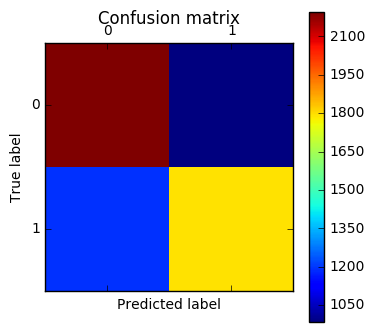

In [79]:
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [80]:
from sklearn.metrics import classification_report
print(classification_report(test_y, 
                            test_pred, 
                            target_names=['Not Bad Buy', 'Bad Buy']))

             precision    recall  f1-score   support

Not Bad Buy       0.65      0.69      0.67      3179
    Bad Buy       0.65      0.60      0.62      2992

avg / total       0.65      0.65      0.65      6171



In [169]:
scores = cross_validation.cross_val_score(clf, train_features, train_target, cv=100)
print 'Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2)

Accuracy: 0.87 (+/- 0.03)


In [170]:
# Random Forest

clsf = RandomForestClassifier(n_estimators=30, 
                             criterion='gini',
                             max_features=None,
                             max_depth=None, 
                             min_samples_leaf=5,
                             bootstrap=True,
                             oob_score=False,
                             random_state=None,
                             class_weight=None) #balanced
scores = cross_validation.cross_val_score(clsf, train_features, train_target, cv=10)
print 'Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2)

Accuracy: 0.87 (+/- 0.01)


In [1490]:
clsf = neighbors.KNeighborsClassifier(10, weights='distance')
scores = cross_validation.cross_val_score(clsf, balanced_train_features, balanced_train_target, cv=10)
print 'Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2)

Accuracy: 0.59 (+/- 0.03)


In [57]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [463]:
clsf = RandomForestClassifier(n_estimators=50)

In [464]:
param_dist = {"max_depth": [2,3,4,5,6,7,8,9,10,11,12,None],
              "max_features": sp_randint(1, len(train_x[0]) + 1),
              "min_samples_split": sp_randint(10, 101),
              "min_samples_leaf": sp_randint(10, 101),
              "bootstrap": [True],
              "criterion": ["entropy", "gini"],
              "class_weight":['balanced', None, {0: 0.3, 1: 0.7}]}

n_iter_search = 200
search = RandomizedSearchCV(clsf, param_distributions=param_dist, n_iter=n_iter_search, 
                            n_jobs=10, scoring=make_scorer(accuracy_score))

In [535]:
search.fit(balanced_train_features, balanced_train_target)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=200, n_jobs=10,
          param_distributions={'bootstrap': [True], 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000000177AD7F0>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000000017812748>, 'criterion': ['entropy', 'gini'], 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000000017812A20>, 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, None], 'class_weight': ['balanced', None, {0: 0.3, 1: 0.7}]},
      

In [536]:
report(search.cv_results_, 3) #search.best_estimator_.estimators_[0]

Model with rank: 1
Mean validation score: 0.656 (std: 0.003)
Parameters: {'bootstrap': True, 'min_samples_leaf': 20, 'min_samples_split': 33, 'criterion': 'gini', 'max_features': 4, 'max_depth': 10, 'class_weight': None}

Model with rank: 2
Mean validation score: 0.654 (std: 0.004)
Parameters: {'bootstrap': True, 'min_samples_leaf': 25, 'min_samples_split': 36, 'criterion': 'gini', 'max_features': 1, 'max_depth': None, 'class_weight': None}

Model with rank: 3
Mean validation score: 0.654 (std: 0.005)
Parameters: {'bootstrap': True, 'min_samples_leaf': 14, 'min_samples_split': 67, 'criterion': 'gini', 'max_features': 4, 'max_depth': 11, 'class_weight': None}



In [171]:
param_grid = {"max_depth": [2,3,4,5,6,7,8,9,10,11,12,None]}
search = GridSearchCV(clsf, param_grid=param_grid, scoring=make_scorer(accuracy_score))

In [172]:
search.fit(balanced_train_features, balanced_train_target)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(accuracy_score), verbose=0)

In [108]:
search.cv_results_ #search.best_estimator_.estimators_[0]

{'mean_fit_time': array([ 1.73666668,  0.39266658,  0.87733348,  1.08999999,  1.09066669,
         1.22033334,  1.66199994,  1.57233334,  0.46566669,  0.64933332,
         0.4509999 ,  1.01699996,  0.76433341,  1.63666677,  0.488     ,
         0.4756666 ,  0.43933328,  0.73233326,  0.53033328,  0.45599993,
         1.32599998,  1.2633334 ,  0.5253334 ,  0.76366663,  0.9313333 ,
         0.59033338,  1.08733336,  1.15033333,  0.45266676,  0.50866659,
         0.46066674,  1.39066672,  0.98233326,  0.35733334,  0.53099998,
         1.07199995,  0.58566674,  0.73933331,  2.24366665,  0.95866664,
         0.34233332,  0.6679999 ,  0.56199996,  0.85700003,  0.76066661,
         0.352     ,  1.7246666 ,  1.17366664,  0.40133341,  1.94399993,
         0.78966673,  0.69599994,  0.28900003,  0.4896667 ,  0.49499989,
         0.45633332,  0.87399999,  0.37866672,  0.71533338,  0.73299996,
         0.5370001 ,  0.49966669,  0.72199996,  1.00633327,  0.66500012,
         0.41699998,  0.9533333 , 

In [616]:
search.best_estimator_.estimators_[0]

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=12,
            max_features=4, max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=35, min_samples_split=38,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=314130525, splitter='best')

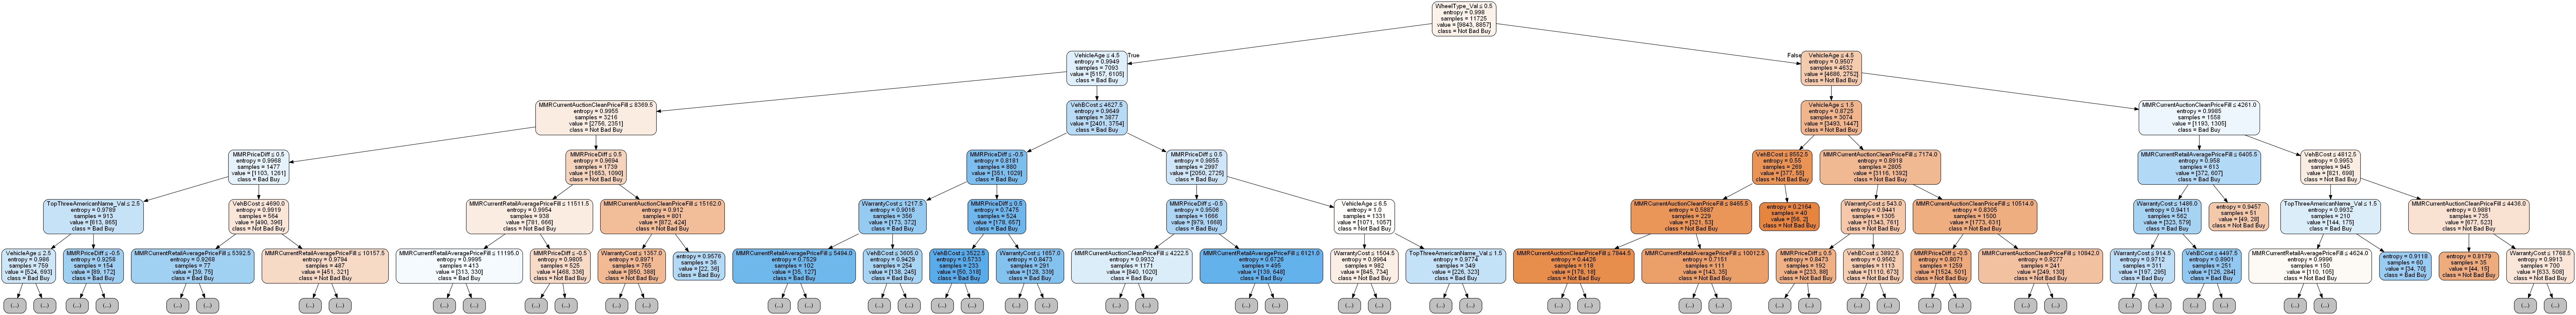

In [618]:
import pydotplus 
from IPython.display import Image  
dot_data = tree.export_graphviz(search.best_estimator_.estimators_[0], out_file=None, 
                         feature_names=list(df_assoc.columns[1:]),  
                         class_names=['Not Bad Buy', 'Bad Buy'],  
                         filled=True, rounded=True,  
                         special_characters=True,
                               max_depth=5)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())